**Ekstrak Audio**

In [ ]:
import os
import subprocess

# Path folder input dan output
input_folder = 'Dataset_Skripsi/Video720p_testing'
output_folder = 'Dataset_Skripsi/Video720p_testing/audios'

os.makedirs(output_folder, exist_ok=True)

# Fungsi untuk mengonversi MP4 ke WAV
def convert_mp4_to_wav(input_path, output_path):
    try:
        subprocess.run(['ffmpeg', '-i', input_path, output_path], check=True)
        print(f"File berhasil dikonversi: {output_path}")
    except Exception as e:
        print(f"Terjadi kesalahan: {e}")

# Iterasi semua file di folder input
for file_name in os.listdir(input_folder):
    print(file_name)
    if file_name.endswith('.mp4'):
        input_file = os.path.join(input_folder, file_name)
        print(input_file)
        output_file = os.path.join(output_folder, os.path.splitext(file_name)[0] + '.wav')
        print(output_file)

        # Konversi file
        convert_mp4_to_wav(input_file, output_file)

aabyjxwqyo.mp4
Dataset_Skripsi/Video720p_testing\aabyjxwqyo.mp4
Dataset_Skripsi/Video720p_testing/audios\aabyjxwqyo.wav
File berhasil dikonversi: Dataset_Skripsi/Video720p_testing/audios\aabyjxwqyo.wav
aaeflzzhvy.mp4
Dataset_Skripsi/Video720p_testing\aaeflzzhvy.mp4
Dataset_Skripsi/Video720p_testing/audios\aaeflzzhvy.wav
File berhasil dikonversi: Dataset_Skripsi/Video720p_testing/audios\aaeflzzhvy.wav
accfrqkrni.mp4
Dataset_Skripsi/Video720p_testing\accfrqkrni.mp4
Dataset_Skripsi/Video720p_testing/audios\accfrqkrni.wav
File berhasil dikonversi: Dataset_Skripsi/Video720p_testing/audios\accfrqkrni.wav
adfzvplbky.mp4
Dataset_Skripsi/Video720p_testing\adfzvplbky.mp4
Dataset_Skripsi/Video720p_testing/audios\adfzvplbky.wav
File berhasil dikonversi: Dataset_Skripsi/Video720p_testing/audios\adfzvplbky.wav
adrqlckutl.mp4
Dataset_Skripsi/Video720p_testing\adrqlckutl.mp4
Dataset_Skripsi/Video720p_testing/audios\adrqlckutl.wav
File berhasil dikonversi: Dataset_Skripsi/Video720p_testing/audios\adrql

In [ ]:
import os
import subprocess

# Path folder input dan output
input_folder = 'Dataset_Skripsi/Video360p_testing'
output_folder = 'Dataset_Skripsi/Video360p_testing/audios'

os.makedirs(output_folder, exist_ok=True)

# Fungsi untuk mengonversi MP4 ke WAV
def convert_mp4_to_wav(input_path, output_path):
    try:
        subprocess.run(['ffmpeg', '-i', input_path, output_path], check=True)
        print(f"File berhasil dikonversi: {output_path}")
    except Exception as e:
        print(f"Terjadi kesalahan: {e}")

# Iterasi semua file di folder input
for file_name in os.listdir(input_folder):
    print(file_name)
    if file_name.endswith('.mp4'):
        input_file = os.path.join(input_folder, file_name)
        print(input_file)
        output_file = os.path.join(output_folder, os.path.splitext(file_name)[0] + '.wav')
        print(output_file)

        # Konversi file
        convert_mp4_to_wav(input_file, output_file)

aabyjxwqyo.mp4
Dataset_Skripsi/Video360p_testing\aabyjxwqyo.mp4
Dataset_Skripsi/Video360p_testing/audios\aabyjxwqyo.wav
File berhasil dikonversi: Dataset_Skripsi/Video360p_testing/audios\aabyjxwqyo.wav
aaeflzzhvy.mp4
Dataset_Skripsi/Video360p_testing\aaeflzzhvy.mp4
Dataset_Skripsi/Video360p_testing/audios\aaeflzzhvy.wav
File berhasil dikonversi: Dataset_Skripsi/Video360p_testing/audios\aaeflzzhvy.wav
accfrqkrni.mp4
Dataset_Skripsi/Video360p_testing\accfrqkrni.mp4
Dataset_Skripsi/Video360p_testing/audios\accfrqkrni.wav
File berhasil dikonversi: Dataset_Skripsi/Video360p_testing/audios\accfrqkrni.wav
adfzvplbky.mp4
Dataset_Skripsi/Video360p_testing\adfzvplbky.mp4
Dataset_Skripsi/Video360p_testing/audios\adfzvplbky.wav
File berhasil dikonversi: Dataset_Skripsi/Video360p_testing/audios\adfzvplbky.wav
adrqlckutl.mp4
Dataset_Skripsi/Video360p_testing\adrqlckutl.mp4
Dataset_Skripsi/Video360p_testing/audios\adrqlckutl.wav
File berhasil dikonversi: Dataset_Skripsi/Video360p_testing/audios\adrql

**Bersihkan Audio dari Noise**

In [8]:
import os
import librosa
import soundfile as sf
import noisereduce as nr
from pydub import AudioSegment
from pydub.effects import normalize

# Folder input dan output
input_folder = 'Dataset_Skripsi/Video360p_testing/audios'
output_folder = 'Dataset_Skripsi/Video360p_testing/audios_enhanced'

# Buat folder output jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Proses setiap file .wav
for file_name in os.listdir(input_folder):
    if file_name.endswith('.wav'):
        input_path = os.path.join(input_folder, file_name)
        output_path = os.path.join(output_folder, file_name)

        # Step 1: Load audio
        y, sr = librosa.load(input_path, sr=None)

        # Step 2: Ambil noise sample dari detik pertama
        noise_sample = y[0:int(sr * 1)]

        # Step 3: Noise reduction
        enhanced = nr.reduce_noise(y=y, y_noise=noise_sample, sr=sr, prop_decrease=1.0)

        # Step 4: Simpan hasil sementara
        temp_path = os.path.join(output_folder, file_name.replace('.wav', '_tmp.wav'))
        sf.write(temp_path, enhanced, sr)

        # Step 5: Normalize dengan pydub
        audio = AudioSegment.from_wav(temp_path)
        normalized = normalize(audio)

        # Step 6: Simpan hasil akhir dengan nama asli
        normalized.export(output_path, format='wav')

        # Hapus file sementara
        os.remove(temp_path)

        print(f'Processed: {file_name} -> {output_path}')

Processed: aabyjxwqyo.wav -> Dataset_Skripsi/Video360p_testing/audios_enhanced\aabyjxwqyo.wav
Processed: aaeflzzhvy.wav -> Dataset_Skripsi/Video360p_testing/audios_enhanced\aaeflzzhvy.wav
Processed: accfrqkrni.wav -> Dataset_Skripsi/Video360p_testing/audios_enhanced\accfrqkrni.wav
Processed: adfzvplbky.wav -> Dataset_Skripsi/Video360p_testing/audios_enhanced\adfzvplbky.wav
Processed: adrqlckutl.wav -> Dataset_Skripsi/Video360p_testing/audios_enhanced\adrqlckutl.wav
Processed: adsxwxeibr.wav -> Dataset_Skripsi/Video360p_testing/audios_enhanced\adsxwxeibr.wav
Processed: ahencqpiin.wav -> Dataset_Skripsi/Video360p_testing/audios_enhanced\ahencqpiin.wav
Processed: alzbizkswy.wav -> Dataset_Skripsi/Video360p_testing/audios_enhanced\alzbizkswy.wav
Processed: alzbizkswy_lipsync.wav -> Dataset_Skripsi/Video360p_testing/audios_enhanced\alzbizkswy_lipsync.wav
Processed: aqhbszcpal.wav -> Dataset_Skripsi/Video360p_testing/audios_enhanced\aqhbszcpal.wav
Processed: baqledjaon.wav -> Dataset_Skripsi

In [ ]:
import librosa
import soundfile as sf
import numpy as np

y, sr = librosa.load("Dataset_Skripsi/audios_enhanced/wrnfrclvdo.wav", sr=16000)
print("Durasi (detik):", len(y) / sr)
print("Rata-rata energi:", np.mean(np.abs(y)))
sf.info("Dataset_Skripsi/audios_enhanced/wrnfrclvdo.wav")

Durasi (detik): 10.005375
Rata-rata energi: 0.01766235


Dataset_Skripsi/audios_enhanced/wrnfrclvdo.wav
samplerate: 48000 Hz
channels: 1
duration: 10.005 s
format: WAV (Microsoft) [WAV]
subtype: Signed 16 bit PCM [PCM_16]

[-0.00158691 -0.00088501 -0.00076294 -0.0010376  -0.00061035 -0.0005188
 -0.00137329 -0.00198364 -0.00210571 -0.00241089 -0.00259399 -0.0022583
 -0.00186157 -0.0017395  -0.00210571 -0.00280762 -0.0032959  -0.0038147
 -0.00463867 -0.00509644]
Total sample: 480256
Sample rate: 48000


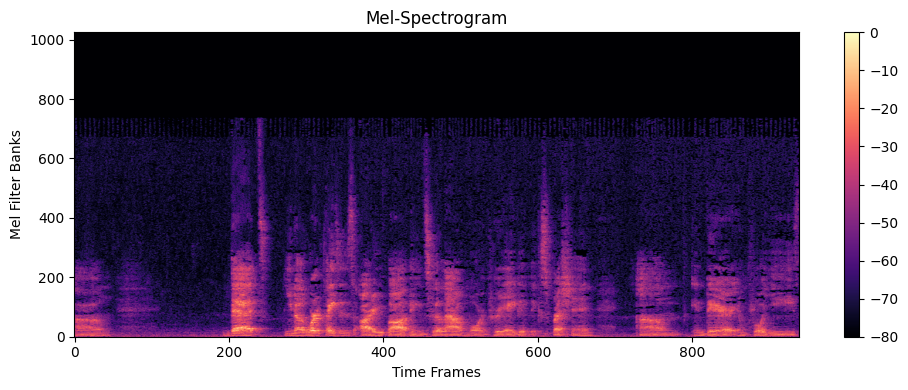

In [60]:
import librosa
import numpy as np
import librosa.display
import matplotlib.pyplot as plt

# Load file audio
y, sr = librosa.load('Dataset/audios/wrnfrclvdo.wav', sr=None)

# y berisi array amplitudo (nilai waveform)
print(y[:20])  # Menampilkan 10 sample pertama
print("Total sample:", len(y))
print("Sample rate:", sr)

# Konversi ke spektrogram
S = librosa.stft(y)
S_dB = librosa.amplitude_to_db(abs(S), ref=np.max)

# Plot spektrogram
plt.figure(figsize=(10, 4))
plt.title("Mel-Spectrogram")
plt.imshow(S_dB, aspect='auto', origin='lower', cmap='magma')
plt.colorbar()
plt.xlabel("Time Frames")
plt.ylabel("Mel Filter Banks")
plt.tight_layout()
plt.show()

[-0.00079346  0.00076294  0.00036621  0.00036621  0.00036621  0.
 -0.00061035 -0.00100708 -0.00140381 -0.00158691 -0.00158691 -0.00158691
 -0.00119019 -0.00119019 -0.00140381 -0.00177002 -0.00256348 -0.00317383
 -0.00415039 -0.00491333]
Total sample: 480256
Sample rate: 48000


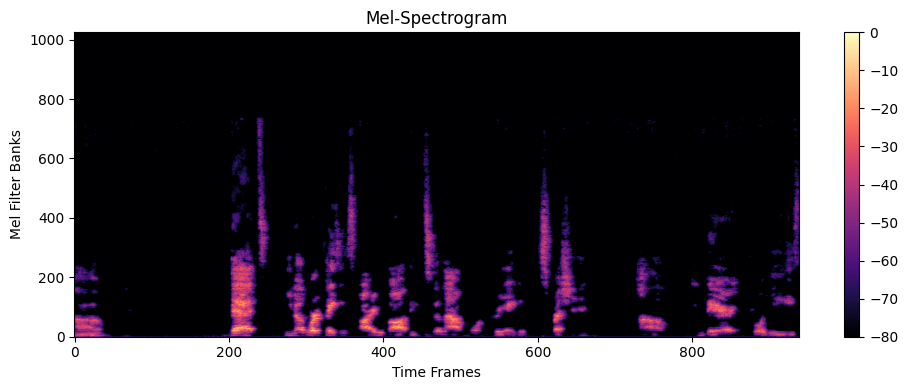

In [61]:
import librosa
import numpy as np
import librosa.display
import matplotlib.pyplot as plt

# Load file audio
y, sr = librosa.load('Dataset_Skripsi/audios_enhanced/wrnfrclvdo.wav', sr=None)

# y berisi array amplitudo (nilai waveform)
print(y[:20])  # Menampilkan 10 sample pertama
print("Total sample:", len(y))
print("Sample rate:", sr)

# Konversi ke spektrogram
S = librosa.stft(y)
S_dB = librosa.amplitude_to_db(abs(S), ref=np.max)

# Plot spektrogram
plt.figure(figsize=(10, 4))
plt.title("Mel-Spectrogram")
plt.imshow(S_dB, aspect='auto', origin='lower', cmap='magma')
plt.colorbar()
plt.xlabel("Time Frames")
plt.ylabel("Mel Filter Banks")
plt.tight_layout()
plt.show()

Buat Dataset Testing (Lip-Sync)

In [4]:
import os
import json
import random
import librosa
import librosa.display
import numpy as np
import moviepy as mp
from tqdm import tqdm
from skimage.metrics import structural_similarity as ssim
from skimage.transform import resize

In [5]:
# Fungsi untuk ekstrak audio dari video
def extract_audio(video_path, output_audio_path):
    video = mp.VideoFileClip(video_path)
    video.audio.write_audiofile(output_audio_path, codec="pcm_s16le", ffmpeg_params=["-ac", "1"])  # Mono

# Fungsi untuk membuat spektrogram
def generate_spectrogram(audio_path):
    y, sr = librosa.load(audio_path, sr=22050)
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_db = librosa.power_to_db(S, ref=np.max)
    return S_db

# Fungsi untuk membandingkan dua spektrogram
def compare_spectrograms(spec1, spec2):
    min_shape = (min(spec1.shape[0], spec2.shape[0]), min(spec1.shape[1], spec2.shape[1]))
    spec1_resized = resize(spec1, min_shape, anti_aliasing=True)
    spec2_resized = resize(spec2, min_shape, anti_aliasing=True)

    spec1_resized = np.interp(spec1_resized, (spec1_resized.min(), spec1_resized.max()), (0, 1))
    spec2_resized = np.interp(spec2_resized, (spec2_resized.min(), spec2_resized.max()), (0, 1))

    return ssim(spec1_resized, spec2_resized, data_range=1.0)

def find_best_match(target_spec, audio_dataset):
    best_match = None
    best_score = -1
    for audio_path in audio_dataset:
        spec = generate_spectrogram(audio_path)
        score = compare_spectrograms(target_spec, spec)
        if score > best_score:
            best_score = score
            best_match = audio_path
    return best_match if best_match else random.choice(audio_dataset)  # Ambil audio acak jika tidak ada match

# Fungsi untuk membuat video baru dengan audio yang diganti
def create_lipsync_video(original_video_path, new_audio_path, output_video_path):
    video = mp.VideoFileClip(original_video_path)
    new_audio = mp.AudioFileClip(new_audio_path)
    video = video.with_audio(new_audio)
    video.write_videofile(output_video_path, codec="libx264", audio_codec="aac")

# Fungsi utama untuk memproses video menjadi "LIP-SYNC DEEPFAKE"
def process_selected_videos(video_folder, audio_folder, metadata_path):
    audio_files = [os.path.join(audio_folder, f) for f in os.listdir(audio_folder) if f.endswith(".wav")]
    print(audio_files)
    
    while True:
        with open(metadata_path, "r") as f:
            metadata = json.load(f)
        
        existing_originals = {info["original"] for info in metadata.values() if info["label"] == "LIP-SYNC DEEPFAKE"}

        for video_name, info in metadata.items():
            if info["label"] == "REAL" and video_name not in existing_originals:
                video_path = os.path.join(video_folder, video_name)
                print(f"Processing: {video_path}")
                
                temp_audio = "temp_audio.wav"
                extract_audio(video_path, temp_audio)
                
                target_spectrogram = generate_spectrogram(temp_audio)
                best_match_audio = find_best_match(target_spectrogram, audio_files)
                print(f"Best match for {video_path} is {best_match_audio}")
                
                new_video_name = video_name.replace(".mp4", "_lipsync.mp4")
                new_video_path = os.path.join(video_folder, new_video_name)
                
                create_lipsync_video(video_path, best_match_audio, new_video_path)
                
                metadata[new_video_name] = {
                    "label": "LIP-SYNC DEEPFAKE",
                    "split": "test",
                    "original": video_name
                }
                
                with open(metadata_path, "w") as f:
                    json.dump(metadata, f, indent=4)
                
                print(f"New LIP-SYNC DEEPFAKE video created: {new_video_path}")
                break  # Baca ulang metadata setelah setiap perubahan

In [6]:
VIDEO_TESTING_FOLDER = "Dataset/testing"
AUDIO_FAKE_FOLDER = "Dataset/audios_fake"
METADATA_TESTING_PATH = "Dataset/testing/metadata.json"

# Jalankan proses
process_selected_videos(VIDEO_TESTING_FOLDER, AUDIO_FAKE_FOLDER, METADATA_TESTING_PATH)

['Dataset/audios_fake\\aamjpjqkhc.wav', 'Dataset/audios_fake\\aauffntidi.wav', 'Dataset/audios_fake\\aavwzojdei.wav', 'Dataset/audios_fake\\abkkrgodfb.wav', 'Dataset/audios_fake\\abldbnaqrk.wav', 'Dataset/audios_fake\\abnkezfgga.wav', 'Dataset/audios_fake\\abpibxailk.wav', 'Dataset/audios_fake\\acdcqpnwcv.wav', 'Dataset/audios_fake\\acldzthtdb.wav', 'Dataset/audios_fake\\acpmgqemao.wav', 'Dataset/audios_fake\\acrmlmgeog.wav', 'Dataset/audios_fake\\acsooctzwo.wav', 'Dataset/audios_fake\\acugesknfp.wav', 'Dataset/audios_fake\\adcbeqixvb.wav', 'Dataset/audios_fake\\adjynjeyrp.wav', 'Dataset/audios_fake\\adtlrixcxe.wav', 'Dataset/audios_fake\\adxvxfsbhw.wav', 'Dataset/audios_fake\\aecaowvcvo.wav', 'Dataset/audios_fake\\aeccicjqmy.wav', 'Dataset/audios_fake\\aepbnctjuv.wav', 'Dataset/audios_fake\\afagmjswbt.wav', 'Dataset/audios_fake\\afuahfjtdh.wav', 'Dataset/audios_fake\\afwdweiwla.wav', 'Dataset/audios_fake\\agcxmqfjos.wav', 'Dataset/audios_fake\\ahczosvxjq.wav', 'Dataset/audios_fake\\ah

MoviePy - Done.


Best match for Dataset/testing\efstpwwzpb.mp4 is Dataset/audios_fake\bapoghwlde.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [720, 1280], 'bitrate': 1610, 'fps': 30.02, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.03, 'bitrate': 1689, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video_size': [720,

MoviePy - Done.
MoviePy - Writing video Dataset/testing\efstpwwzpb_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\efstpwwzpb_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\efstpwwzpb_lipsync.mp4
Processing: Dataset/testing\glxfafqbcf.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2641, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2720, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\glxfafqbcf.mp4 is Dataset/audios_fake\hnambobzhb.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2641, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2720, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\glxfafqbcf_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\glxfafqbcf_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\glxfafqbcf_lipsync.mp4
Processing: Dataset/testing\ubbzrfgzer.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2814, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2893, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\ubbzrfgzer.mp4 is Dataset/audios_fake\ezhncxjtjw.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2814, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2893, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\ubbzrfgzer_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\ubbzrfgzer_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\ubbzrfgzer_lipsync.mp4
Processing: Dataset/testing\dwmsebyypl.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [720, 1280], 'bitrate': 1096, 'fps': 30.02, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.03, 'bitrate': 1175, 'start': 0.0, 'default_video_input_number'

MoviePy - Done.


Best match for Dataset/testing\dwmsebyypl.mp4 is Dataset/audios_fake\bagssbeokq.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [720, 1280], 'bitrate': 1096, 'fps': 30.02, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.03, 'bitrate': 1175, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video_size': [720,

MoviePy - Done.
MoviePy - Writing video Dataset/testing\dwmsebyypl_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\dwmsebyypl_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\dwmsebyypl_lipsync.mp4
Processing: Dataset/testing\mlizcisxro.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2758, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2837, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\mlizcisxro.mp4 is Dataset/audios_fake\dalwecbssl.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2758, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2837, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\mlizcisxro_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\mlizcisxro_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\mlizcisxro_lipsync.mp4
Processing: Dataset/testing\xofswkdrvb.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2822, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2902, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\xofswkdrvb.mp4 is Dataset/audios_fake\blqcmqslyk.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2822, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2902, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\xofswkdrvb_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\xofswkdrvb_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\xofswkdrvb_lipsync.mp4
Processing: Dataset/testing\wunigwmyit.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3100, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3179, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\wunigwmyit.mp4 is Dataset/audios_fake\alckeawtjp.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3100, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3179, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\wunigwmyit_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\wunigwmyit_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\wunigwmyit_lipsync.mp4
Processing: Dataset/testing\yfnalahkmb.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [720, 1280], 'bitrate': 1751, 'fps': 30.02, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.03, 'bitrate': 1830, 'start': 0.0, 'default_video_input_number'

MoviePy - Done.
Best match for Dataset/testing\yfnalahkmb.mp4 is Dataset/audios_fake\aktxqigpwt.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [720, 1280], 'bitrate': 1751, 'fps': 30.02, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.03, 'bitrate': 1830, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'vi

MoviePy - Done.
MoviePy - Writing video Dataset/testing\yfnalahkmb_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\yfnalahkmb_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\yfnalahkmb_lipsync.mp4
Processing: Dataset/testing\tmpzveqsou.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [720, 1280], 'bitrate': 1234, 'fps': 30.02, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.03, 'bitrate': 1313, 'start': 0.0, 'default_video_input_number'

MoviePy - Done.
Best match for Dataset/testing\tmpzveqsou.mp4 is Dataset/audios_fake\acldzthtdb.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [720, 1280], 'bitrate': 1234, 'fps': 30.02, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.03, 'bitrate': 1313, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'vi

MoviePy - Done.
MoviePy - Writing video Dataset/testing\tmpzveqsou_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\tmpzveqsou_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\tmpzveqsou_lipsync.mp4
Processing: Dataset/testing\bhqcqwcise.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [720, 1280], 'bitrate': 2059, 'fps': 30.02, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.03, 'bitrate': 2138, 'start': 0.0, 'default_video_input_number'

MoviePy - Done.
Best match for Dataset/testing\bhqcqwcise.mp4 is Dataset/audios_fake\aicvhawriu.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [720, 1280], 'bitrate': 2059, 'fps': 30.02, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.03, 'bitrate': 2138, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'vi

MoviePy - Done.
MoviePy - Writing video Dataset/testing\bhqcqwcise_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\bhqcqwcise_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\bhqcqwcise_lipsync.mp4
Processing: Dataset/testing\emgciwmtuj.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2608, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2687, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\emgciwmtuj.mp4 is Dataset/audios_fake\bgebfcoxuz.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2608, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2687, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\emgciwmtuj_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\emgciwmtuj_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\emgciwmtuj_lipsync.mp4
Processing: Dataset/testing\szwhgmrrhm.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3589, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3668, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\szwhgmrrhm.mp4 is Dataset/audios_fake\dalwecbssl.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3589, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3668, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\szwhgmrrhm_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\szwhgmrrhm_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\szwhgmrrhm_lipsync.mp4
Processing: Dataset/testing\alzbizkswy.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1080, 1920], 'bitrate': 3120, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3200, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\alzbizkswy.mp4 is Dataset/audios_fake\gkvydkllyn.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1080, 1920], 'bitrate': 3120, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3200, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\alzbizkswy_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\alzbizkswy_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\alzbizkswy_lipsync.mp4
Processing: Dataset/testing\qdbiwougrn.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2324, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2403, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\qdbiwougrn.mp4 is Dataset/audios_fake\acldzthtdb.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2324, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2403, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.


MoviePy - Writing video Dataset/testing\qdbiwougrn_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\qdbiwougrn_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\qdbiwougrn_lipsync.mp4
Processing: Dataset/testing\peqrlhqeuk.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3649, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3728, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\peqrlhqeuk.mp4 is Dataset/audios_fake\eafptmmzpn.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3649, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3728, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\peqrlhqeuk_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\peqrlhqeuk_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\peqrlhqeuk_lipsync.mp4
Processing: Dataset/testing\bfkzrgovsv.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2706, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2785, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\bfkzrgovsv.mp4 is Dataset/audios_fake\cymacnqyqw.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2706, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2785, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\bfkzrgovsv_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\bfkzrgovsv_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\bfkzrgovsv_lipsync.mp4
Processing: Dataset/testing\dopcoxsotn.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3323, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3403, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\dopcoxsotn.mp4 is Dataset/audios_fake\cwnagpgres.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3323, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3403, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\dopcoxsotn_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\dopcoxsotn_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\dopcoxsotn_lipsync.mp4
Processing: Dataset/testing\sfslnpbvtq.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2833, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2912, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\sfslnpbvtq.mp4 is Dataset/audios_fake\ejwbqtyosm.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2833, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2912, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\sfslnpbvtq_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\sfslnpbvtq_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\sfslnpbvtq_lipsync.mp4
Processing: Dataset/testing\wgycqahjww.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3338, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3417, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\wgycqahjww.mp4 is Dataset/audios_fake\acldzthtdb.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3338, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3417, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\wgycqahjww_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\wgycqahjww_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\wgycqahjww_lipsync.mp4
Processing: Dataset/testing\ooavdkhcnf.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [720, 1280], 'bitrate': 1363, 'fps': 30.02, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.03, 'bitrate': 1443, 'start': 0.0, 'default_video_input_number'

MoviePy - Done.
Best match for Dataset/testing\ooavdkhcnf.mp4 is Dataset/audios_fake\acldzthtdb.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [720, 1280], 'bitrate': 1363, 'fps': 30.02, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.03, 'bitrate': 1443, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'vi

MoviePy - Done.
MoviePy - Writing video Dataset/testing\ooavdkhcnf_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\ooavdkhcnf_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\ooavdkhcnf_lipsync.mp4
Processing: Dataset/testing\vddzflpeat.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [720, 1280], 'bitrate': 1197, 'fps': 30.02, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.03, 'bitrate': 1276, 'start': 0.0, 'default_video_input_number'

MoviePy - Done.


Best match for Dataset/testing\vddzflpeat.mp4 is Dataset/audios_fake\arvdebtahl.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [720, 1280], 'bitrate': 1197, 'fps': 30.02, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.03, 'bitrate': 1276, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video_size': [720,

MoviePy - Done.
MoviePy - Writing video Dataset/testing\vddzflpeat_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\vddzflpeat_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\vddzflpeat_lipsync.mp4
Processing: Dataset/testing\idklchvhxp.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2893, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2973, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\idklchvhxp.mp4 is Dataset/audios_fake\exobpiroru.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2893, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2973, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\idklchvhxp_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\idklchvhxp_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\idklchvhxp_lipsync.mp4
Processing: Dataset/testing\yvfoaoiclp.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3628, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3707, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\yvfoaoiclp.mp4 is Dataset/audios_fake\devkqhjvjr.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3628, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3707, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\yvfoaoiclp_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\yvfoaoiclp_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\yvfoaoiclp_lipsync.mp4
Processing: Dataset/testing\mthkmtbuab.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3044, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3123, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\mthkmtbuab.mp4 is Dataset/audios_fake\bagssbeokq.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3044, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3123, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\mthkmtbuab_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\mthkmtbuab_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\mthkmtbuab_lipsync.mp4
Processing: Dataset/testing\ksyvrepnua.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 4038, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 4117, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\ksyvrepnua.mp4 is Dataset/audios_fake\aicvhawriu.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 4038, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 4117, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.


MoviePy - Writing video Dataset/testing\ksyvrepnua_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\ksyvrepnua_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\ksyvrepnua_lipsync.mp4
Processing: Dataset/testing\dpegbdzijf.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3066, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3146, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\dpegbdzijf.mp4 is Dataset/audios_fake\clmdutckle.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3066, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3146, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\dpegbdzijf_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\dpegbdzijf_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\dpegbdzijf_lipsync.mp4
Processing: Dataset/testing\qpmepdhqlv.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2707, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2786, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\qpmepdhqlv.mp4 is Dataset/audios_fake\acugesknfp.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2707, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2786, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\qpmepdhqlv_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\qpmepdhqlv_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\qpmepdhqlv_lipsync.mp4
Processing: Dataset/testing\eaxkilqqgu.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2885, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2964, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\eaxkilqqgu.mp4 is Dataset/audios_fake\furxbypblg.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2885, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2964, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\eaxkilqqgu_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\eaxkilqqgu_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\eaxkilqqgu_lipsync.mp4
Processing: Dataset/testing\mnlxxoicoo.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2368, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2447, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\mnlxxoicoo.mp4 is Dataset/audios_fake\ajlwskvcvo.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2368, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2447, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\mnlxxoicoo_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\mnlxxoicoo_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\mnlxxoicoo_lipsync.mp4
Processing: Dataset/testing\sailncwlmk.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1080, 1920], 'bitrate': 4811, 'fps': 30.01, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.03, 'bitrate': 4890, 'start': 0.0, 'default_video_input_number

MoviePy - Done.


Best match for Dataset/testing\sailncwlmk.mp4 is Dataset/audios_fake\arvdebtahl.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1080, 1920], 'bitrate': 4811, 'fps': 30.01, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.03, 'bitrate': 4890, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video_size': [108

MoviePy - Done.


MoviePy - Writing video Dataset/testing\sailncwlmk_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\sailncwlmk_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\sailncwlmk_lipsync.mp4
Processing: Dataset/testing\fafelguets.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2972, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3051, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\fafelguets.mp4 is Dataset/audios_fake\arvdebtahl.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2972, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3051, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\fafelguets_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\fafelguets_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\fafelguets_lipsync.mp4
Processing: Dataset/testing\encvnokybd.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3375, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3455, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\encvnokybd.mp4 is Dataset/audios_fake\bagssbeokq.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3375, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3455, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.


MoviePy - Writing video Dataset/testing\encvnokybd_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\encvnokybd_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\encvnokybd_lipsync.mp4
Processing: Dataset/testing\ynmluajwre.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3027, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3106, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\ynmluajwre.mp4 is Dataset/audios_fake\anrcuqghaj.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3027, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3106, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\ynmluajwre_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\ynmluajwre_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\ynmluajwre_lipsync.mp4
Processing: Dataset/testing\rslxpafeir.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 4134, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 4213, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\rslxpafeir.mp4 is Dataset/audios_fake\mfplnxyqda.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 4134, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 4213, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.


MoviePy - Writing video Dataset/testing\rslxpafeir_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\rslxpafeir_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\rslxpafeir_lipsync.mp4
Processing: Dataset/testing\scrogtfgmn.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1080, 1920], 'bitrate': 4028, 'fps': 29.86, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 4107, 'start': 0.0, 'default_video_input_number

MoviePy - Done.


Best match for Dataset/testing\scrogtfgmn.mp4 is Dataset/audios_fake\aauffntidi.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1080, 1920], 'bitrate': 4028, 'fps': 29.86, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 4107, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video_size': [108

MoviePy - Done.
MoviePy - Writing video Dataset/testing\scrogtfgmn_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\scrogtfgmn_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\scrogtfgmn_lipsync.mp4
Processing: Dataset/testing\zyfxvtxrsk.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1080, 1920], 'bitrate': 3549, 'fps': 29.86, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3628, 'start': 0.0, 'default_video_input_number

MoviePy - Done.


Best match for Dataset/testing\zyfxvtxrsk.mp4 is Dataset/audios_fake\bnxuzwyftq.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1080, 1920], 'bitrate': 3549, 'fps': 29.86, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3628, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video_size': [108

MoviePy - Done.
MoviePy - Writing video Dataset/testing\zyfxvtxrsk_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\zyfxvtxrsk_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\zyfxvtxrsk_lipsync.mp4
Processing: Dataset/testing\jygbqsigcr.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1080, 1920], 'bitrate': 3478, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3557, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\jygbqsigcr.mp4 is Dataset/audios_fake\ffqmsqrogh.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1080, 1920], 'bitrate': 3478, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 44100, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3557, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\jygbqsigcr_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\jygbqsigcr_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\jygbqsigcr_lipsync.mp4
Processing: Dataset/testing\kdnwqamydh.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2756, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2835, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\kdnwqamydh.mp4 is Dataset/audios_fake\arvdebtahl.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2756, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2835, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\kdnwqamydh_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\kdnwqamydh_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\kdnwqamydh_lipsync.mp4
Processing: Dataset/testing\sscrakrzom.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2448, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2527, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\sscrakrzom.mp4 is Dataset/audios_fake\arvdebtahl.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2448, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2527, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\sscrakrzom_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\sscrakrzom_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\sscrakrzom_lipsync.mp4
Processing: Dataset/testing\kclflittyf.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2744, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2823, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\kclflittyf.mp4 is Dataset/audios_fake\arvdebtahl.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2744, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2823, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.


MoviePy - Writing video Dataset/testing\kclflittyf_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\kclflittyf_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\kclflittyf_lipsync.mp4
Processing: Dataset/testing\chnbexdyhq.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 4137, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 4216, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\chnbexdyhq.mp4 is Dataset/audios_fake\bpkfgwqvjk.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 4137, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 4216, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\chnbexdyhq_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\chnbexdyhq_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\chnbexdyhq_lipsync.mp4
Processing: Dataset/testing\tdrraoezra.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3096, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3175, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\tdrraoezra.mp4 is Dataset/audios_fake\adxvxfsbhw.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3096, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3175, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\tdrraoezra_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\tdrraoezra_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\tdrraoezra_lipsync.mp4
Processing: Dataset/testing\barbcborgl.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2770, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2850, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\barbcborgl.mp4 is Dataset/audios_fake\arvdebtahl.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2770, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2850, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\barbcborgl_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\barbcborgl_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\barbcborgl_lipsync.mp4
Processing: Dataset/testing\hjlzopctcs.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3817, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3896, 'start': 0.0, 'default_video_

MoviePy - Done.
Best match for Dataset/testing\hjlzopctcs.mp4 is Dataset/audios_fake\ajlwskvcvo.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3817, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3896, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': 

MoviePy - Done.
MoviePy - Writing video Dataset/testing\hjlzopctcs_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\hjlzopctcs_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\hjlzopctcs_lipsync.mp4
Processing: Dataset/testing\chjatzdqcl.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3220, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3300, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\chjatzdqcl.mp4 is Dataset/audios_fake\anrcuqghaj.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3220, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3300, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\chjatzdqcl_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\chjatzdqcl_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\chjatzdqcl_lipsync.mp4
Processing: Dataset/testing\dsveelyrgf.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2687, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2766, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\dsveelyrgf.mp4 is Dataset/audios_fake\exobpiroru.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2687, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2766, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\dsveelyrgf_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\dsveelyrgf_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\dsveelyrgf_lipsync.mp4
Processing: Dataset/testing\hazcvdjzyf.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3959, 'fps': 30.13, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.02, 'bitrate': 4038, 'start': 0.0, 'default_video_input_number

MoviePy - Done.


Best match for Dataset/testing\hazcvdjzyf.mp4 is Dataset/audios_fake\dkztuuoshv.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3959, 'fps': 30.13, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.02, 'bitrate': 4038, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video_size': [192

MoviePy - Done.
MoviePy - Writing video Dataset/testing\hazcvdjzyf_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\hazcvdjzyf_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\hazcvdjzyf_lipsync.mp4
Processing: Dataset/testing\gnslcjmktc.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3665, 'fps': 30.13, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.02, 'bitrate': 3744, 'start': 0.0, 'default_video_input_number

MoviePy - Done.


Best match for Dataset/testing\gnslcjmktc.mp4 is Dataset/audios_fake\tyvaqjlgfq.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3665, 'fps': 30.13, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.02, 'bitrate': 3744, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video_size': [192

MoviePy - Done.
MoviePy - Writing video Dataset/testing\gnslcjmktc_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\gnslcjmktc_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\gnslcjmktc_lipsync.mp4
Processing: Dataset/testing\uwjbwegyfx.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3077, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3156, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\uwjbwegyfx.mp4 is Dataset/audios_fake\byprtayfed.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 3077, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 3156, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\uwjbwegyfx_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\uwjbwegyfx_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\uwjbwegyfx_lipsync.mp4
Processing: Dataset/testing\pkpxhevjjz.mp4
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2595, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2675, 'start': 0.0, 'default_video_

MoviePy - Done.


Best match for Dataset/testing\pkpxhevjjz.mp4 is Dataset/audios_fake\audcaumiyk.wav
{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.71.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [1920, 1080], 'bitrate': 2595, 'fps': 29.97002997002997, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 69, 'metadata': {'Metadata': '', 'handler_name': 'SoundHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 10.01, 'bitrate': 2675, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video

MoviePy - Done.
MoviePy - Writing video Dataset/testing\pkpxhevjjz_lipsync.mp4



MoviePy - Done !
MoviePy - video ready Dataset/testing\pkpxhevjjz_lipsync.mp4
New LIP-SYNC DEEPFAKE video created: Dataset/testing\pkpxhevjjz_lipsync.mp4


KeyboardInterrupt: 

Buat Dataset Testing (Lip-Sync) Untuk Perbandingan Kualitas

In [ ]:
import os
import subprocess
import torch
import librosa
import numpy as np
import cv2
import dlib
import torch.nn.functional as F
import soundfile as sf
from imutils import face_utils
from pydub import AudioSegment
from pydub.effects import normalize
import noisereduce as nr
import torchvision.transforms as T

# Preprocessing transform untuk bibir
transform = T.Compose([
    T.ToPILImage(),
    T.Resize((224, 224)),
    T.ToTensor()
])

# Ekstrak area mulut dengan padding
def extract_mouth(frame, landmarks):
    x = landmarks[48:68, 0]
    y = landmarks[48:68, 1]
    x1, x2 = np.min(x), np.max(x)
    y1, y2 = np.min(y), np.max(y)
    pad = 10
    return frame[max(0, y1-pad):y2+pad, max(0, x1-pad):x2+pad]

# Ekstrak untuk Bibir dengan Model Pretrained
def extract_mouth_frames(video_path, fps=5):
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

    cap = cv2.VideoCapture(video_path)
    video_fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = total_frames / video_fps

    target_frame_idxs = np.linspace(0, total_frames - 1, int(duration * fps), dtype=int)

    frames = []
    idx = 0
    current_frame = 0
    last_valid_mouth = None

    while cap.isOpened() and idx < len(target_frame_idxs):
        ret, frame = cap.read()
        if not ret:
            break

        if current_frame == target_frame_idxs[idx]:
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            faces = detector(gray)

            if len(faces) > 0:
                shape = predictor(gray, faces[0])
                landmarks = np.array([[p.x, p.y] for p in shape.parts()])
                mouth = extract_mouth(frame, landmarks)

                if mouth.size > 0:
                    mouth_tensor = transform(mouth)
                    last_valid_mouth = mouth_tensor.clone()
                    frames.append(mouth_tensor)
                else:
                    if last_valid_mouth is not None:
                        frames.append(last_valid_mouth.clone())
                    else:
                        print(f"[SKIP] frame {current_frame}: belum ada mulut valid")
            else:
                if last_valid_mouth is not None:
                    frames.append(last_valid_mouth.clone())
                else:
                    print(f"[SKIP] frame {current_frame}: belum ada wajah valid")

            idx += 1

        current_frame += 1

    cap.release()
    return frames

# Ekstrak audio dengan ffmpeg
def extract_audio_from_video(video_path, output_audio_path):
    command = [
        'ffmpeg', '-y', '-i', video_path, '-ac', '1', '-ar', '16000', output_audio_path
    ]
    subprocess.run(command, stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)

# Bersihkan audio dari noise
def denoise_and_normalize_audio(input_audio_path, output_audio_path):
    y, sr = librosa.load(input_audio_path, sr=None)
    
    noise_sample = y[0:int(sr * 1)]
    
    enhanced = nr.reduce_noise(y=y, y_noise=noise_sample, sr=sr, prop_decrease=1.0)

    temp_path = input_audio_path.replace('.wav', '_tmp.wav')
    sf.write(temp_path, enhanced, sr)

    audio = AudioSegment.from_wav(temp_path)
    normalized = normalize(audio)

    normalized.export(output_audio_path, format='wav')

    os.remove(temp_path)

def extract_mel_spectrogram(audio_path, target_frames, sr_target=16000, n_mels=128):
    y, sr = librosa.load(audio_path, sr=sr_target)
    duration = target_frames / 5  # 5 fps => 200 ms per frame
    max_len = int(duration * sr_target)

    if len(y) > max_len:
        y = y[:max_len]
    else:
        y = np.pad(y, (0, max_len - len(y)), 'constant')

    S = librosa.stft(y, n_fft=2048, hop_length=512)
    S_power = np.abs(S) ** 2
    mel = librosa.feature.melspectrogram(S=S_power, sr=sr_target, n_mels=n_mels)

    mel_db = librosa.power_to_db(mel, ref=np.max)
    mel_tensor = torch.tensor(mel_db).unsqueeze(0)
    return mel_tensor

def interpolate_mel(mel_tensor, target_T):
    mel_tensor = mel_tensor.unsqueeze(0)
    mel_resized = F.interpolate(mel_tensor, size=(mel_tensor.shape[2], target_T), mode='bilinear', align_corners=False)
    return mel_resized.squeeze(0)

#FUNGSI UTAMA : Extract Lips dan Audio
def process_video_and_save(video_path, label, save_path, fps=5):
    temp_audio_path_raw = "temp_audio_raw.wav"
    temp_audio_path_clean = "temp_audio_clean.wav"

    try:
        # Hitung durasi video
        cap = cv2.VideoCapture(video_path)
        video_fps = cap.get(cv2.CAP_PROP_FPS)
        frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
        duration_sec = frame_count / video_fps
        cap.release()

        expected_min_frame_count = int(duration_sec * fps)

        # Ekstraksi Audio dari Video
        extract_audio_from_video(video_path, temp_audio_path_raw)
        denoise_and_normalize_audio(temp_audio_path_raw, temp_audio_path_clean)

        # Ekstraksi Frame Bibir
        frames = extract_mouth_frames(video_path, fps=fps)
        if len(frames) < expected_min_frame_count:
            print(f"[SKIP] {video_path}: hanya {len(frames)} frame bibir < {expected_min_frame_count}")
            return

        frames_tensor = torch.stack(frames)
        T_bibir = frames_tensor.shape[0]

        # Ekstraksi dan Interpolasi Mel Spectrogram
        mel_tensor = extract_mel_spectrogram(temp_audio_path_clean, target_frames=T_bibir)
        mel_tensor = interpolate_mel(mel_tensor, target_T=T_bibir)

        T_audio = mel_tensor.shape[-1]
        if T_bibir != T_audio:
            print(f"[SKIP] {video_path} tidak sinkron: bibir {T_bibir} ≠ audio {T_audio}")
            return

        # Simpan sebagai file .pt
        data = {
            'frames': frames_tensor,  # (T, 3, 224, 224)
            'audio': mel_tensor,      # (1, F, T)
            'label': label            # int label
        }
        torch.save(data, save_path)

    except Exception as e:
        print(f"[ERROR] {video_path}: {e}")

    finally:
        # Bersihkan file audio sementara
        if os.path.exists(temp_audio_path_raw):
            os.remove(temp_audio_path_raw)
        if os.path.exists(temp_audio_path_clean):
            os.remove(temp_audio_path_clean)


c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import os
import json
from tqdm import tqdm

video_dir = "Dataset"
audio_dir = "Dataset_Skripsi/audios_enhanced"
metadata_path = "Dataset/metadata.json"
save_dir = "Dataset Deepfake Preprocessed/Preprocessed Bibir Audio"

os.makedirs(save_dir, exist_ok=True)

# Hanya ambil label yang ingin diproses
label_map = {
    "REAL": 0,
    "LIP-SYNC DEEPFAKE": 1
}

# Load metadata
with open(metadata_path, 'r') as f:
    metadata = json.load(f)

# Loop video berdasarkan metadata
for fname, meta in tqdm(metadata.items()):
    label_name = meta.get("label")
    if label_name not in label_map:
        continue

    label = label_map[label_name]
    video_path = os.path.join(video_dir, fname)
    audio_path = os.path.join(audio_dir, fname.replace(".mp4", ".wav"))
    save_path = os.path.join(save_dir, fname.replace(".mp4", ".pt"))

    if not os.path.exists(video_path):
        print(f"[SKIP] Video tidak ditemukan: {video_path}")
        continue
    if not os.path.exists(audio_path):
        print(f"[SKIP] Audio tidak ditemukan: {audio_path}")
        continue

    process_video_and_save(video_path, label, save_path, fps=5)


 51%|█████     | 253/500 [29:08<33:47,  8.21s/it]

[SKIP] frame 0: belum ada wajah valid


 51%|█████     | 255/500 [29:25<33:30,  8.21s/it]

[SKIP] Dataset\lkypoiafbx.mp4: hanya 49 frame bibir < 50


 69%|██████▉   | 345/500 [43:17<32:03, 12.41s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid


 69%|██████▉   | 346/500 [43:28<31:10, 12.14s/it]

[SKIP] Dataset\wnlamfqjaj_lipsync.mp4: hanya 44 frame bibir < 50


 83%|████████▎ | 415/500 [58:36<16:44, 11.82s/it]

[SKIP] frame 0: belum ada wajah valid


 83%|████████▎ | 416/500 [58:48<16:28, 11.77s/it]

[SKIP] Dataset\ieazyslhjp_lipsync.mp4: hanya 49 frame bibir < 50


 92%|█████████▏| 462/500 [1:06:45<07:37, 12.04s/it]

[SKIP] frame 0: belum ada wajah valid


 93%|█████████▎| 463/500 [1:06:57<07:19, 11.89s/it]

[SKIP] Dataset\lkypoiafbx_lipsync.mp4: hanya 49 frame bibir < 50


100%|██████████| 500/500 [1:14:10<00:00,  8.90s/it]


In [2]:
import os
import json
from tqdm import tqdm

video_dir = "Dataset/testing"
audio_dir = "Dataset_Skripsi/testing CNN-BiLSTM/audios_enhanced"
metadata_path = "Dataset/testing/metadata.json"
save_dir = "Dataset Deepfake Preprocessed/Preprocessed Bibir Audio/testing/testing 1080p"

os.makedirs(save_dir, exist_ok=True)

# Hanya ambil label yang ingin diproses
label_map = {
    "REAL": 0,
    "LIP-SYNC DEEPFAKE": 1
}

# Load metadata
with open(metadata_path, 'r') as f:
    metadata = json.load(f)

# Loop video berdasarkan metadata
for fname, meta in tqdm(metadata.items()):
    label_name = meta.get("label")
    if label_name not in label_map:
        continue

    label = label_map[label_name]
    video_path = os.path.join(video_dir, fname)
    audio_path = os.path.join(audio_dir, fname.replace(".mp4", ".wav"))
    save_path = os.path.join(save_dir, fname.replace(".mp4", ".pt"))

    if not os.path.exists(video_path):
        print(f"[SKIP] Video tidak ditemukan: {video_path}")
        continue
    if not os.path.exists(audio_path):
        print(f"[SKIP] Audio tidak ditemukan: {audio_path}")
        continue

    process_video_and_save(video_path, label, save_path, fps=5)


  6%|▌         | 9/150 [00:33<09:50,  4.19s/it]

[SKIP] frame 0: belum ada wajah valid


  7%|▋         | 10/150 [00:39<10:53,  4.67s/it]

[SKIP] Dataset/testing\dwmsebyypl.mp4: hanya 49 frame bibir < 50


 15%|█▍        | 22/150 [01:21<07:03,  3.31s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 104: belum ada wajah valid
[SKIP] frame 110: belum ada wajah valid
[SKIP] frame 116: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 153: b

 15%|█▌        | 23/150 [01:25<07:22,  3.49s/it]

[SKIP] frame 287: belum ada wajah valid
[SKIP] frame 293: belum ada wajah valid
[SKIP] frame 300: belum ada wajah valid
[SKIP] Dataset/testing\tmpzveqsou.mp4: hanya 0 frame bibir < 50


 22%|██▏       | 33/150 [03:15<21:04, 10.81s/it]

[SKIP] frame 0: belum ada wajah valid


 23%|██▎       | 34/150 [03:22<18:58,  9.81s/it]

[SKIP] Dataset/testing\ooavdkhcnf.mp4: hanya 49 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid


 23%|██▎       | 35/150 [03:29<17:04,  8.91s/it]

[SKIP] Dataset/testing\vddzflpeat.mp4: hanya 41 frame bibir < 50


 69%|██████▊   | 103/150 [09:42<02:49,  3.62s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid


 69%|██████▉   | 104/150 [09:49<03:05,  4.02s/it]

[SKIP] Dataset/testing\dwmsebyypl_lipsync.mp4: hanya 45 frame bibir < 50


 72%|███████▏  | 108/150 [10:39<05:58,  8.54s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 104: belum ada wajah valid
[SKIP] frame 110: belum ada wajah valid
[SKIP] frame 116: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 153: b

 73%|███████▎  | 109/150 [10:44<05:12,  7.62s/it]

[SKIP] frame 300: belum ada wajah valid
[SKIP] Dataset/testing\tmpzveqsou_lipsync.mp4: hanya 0 frame bibir < 50


 79%|███████▉  | 119/150 [12:38<06:02, 11.68s/it]

[SKIP] frame 0: belum ada wajah valid


 80%|████████  | 120/150 [12:45<05:10, 10.36s/it]

[SKIP] Dataset/testing\ooavdkhcnf_lipsync.mp4: hanya 49 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid


 81%|████████  | 121/150 [12:52<04:31,  9.36s/it]

[SKIP] Dataset/testing\vddzflpeat_lipsync.mp4: hanya 46 frame bibir < 50


100%|██████████| 150/150 [18:39<00:00,  7.46s/it]


In [3]:
import os
import json
from tqdm import tqdm

video_dir = "Dataset/testing"
audio_dir = "Dataset_Skripsi/testing CNN-BiLSTM/audios_enhanced"
metadata_path = "Dataset/testing/metadata.json"
save_dir = "Dataset Deepfake Preprocessed/Preprocessed Bibir Audio/testing/testing 1080p/Face-Swap Deepfake"

os.makedirs(save_dir, exist_ok=True)

# Hanya ambil label yang ingin diproses
label_map = {
    "FACE-SWAP DEEPFAKE": 1
}

# Load metadata
with open(metadata_path, 'r') as f:
    metadata = json.load(f)

# Loop video berdasarkan metadata
for fname, meta in tqdm(metadata.items()):
    label_name = meta.get("label")
    if label_name not in label_map:
        continue

    label = label_map[label_name]
    video_path = os.path.join(video_dir, fname)
    audio_path = os.path.join(audio_dir, fname.replace(".mp4", ".wav"))
    save_path = os.path.join(save_dir, fname.replace(".mp4", ".pt"))

    if not os.path.exists(video_path):
        print(f"[SKIP] Video tidak ditemukan: {video_path}")
        continue
    if not os.path.exists(audio_path):
        print(f"[SKIP] Audio tidak ditemukan: {audio_path}")
        continue

    process_video_and_save(video_path, label, save_path, fps=5)


  1%|          | 1/150 [00:06<16:53,  6.80s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid


  1%|▏         | 2/150 [00:13<16:21,  6.63s/it]

[SKIP] Dataset/testing\adfzvplbky.mp4: hanya 39 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid


  2%|▏         | 3/150 [00:20<16:55,  6.91s/it]

[SKIP] Dataset/testing\adrqlckutl.mp4: hanya 49 frame bibir < 50


  3%|▎         | 4/150 [00:32<21:33,  8.86s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid


  4%|▍         | 6/150 [00:43<17:06,  7.13s/it]

[SKIP] Dataset/testing\evyqbkbsiv.mp4: hanya 42 frame bibir < 50


 11%|█▏        | 17/150 [01:31<10:39,  4.81s/it]

[SKIP] frame 0: belum ada wajah valid


 12%|█▏        | 18/150 [01:43<13:52,  6.31s/it]

[SKIP] Dataset/testing\ohmkmcfxul.mp4: hanya 49 frame bibir < 50


 14%|█▍        | 21/150 [01:58<12:17,  5.72s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid


 25%|██▍       | 37/150 [02:09<02:57,  1.57s/it]

[SKIP] Dataset/testing\ahencqpiin.mp4: hanya 44 frame bibir < 50


100%|██████████| 150/150 [09:06<00:00,  3.64s/it]


In [4]:
import os
import json
from tqdm import tqdm

video_dir = "Dataset_Skripsi/Video360p_testing"
audio_dir = "Dataset_Skripsi/Video360p_testing/audios_enhanced"
metadata_path = "Dataset/testing/metadata.json"
save_dir = "Dataset Deepfake Preprocessed/Preprocessed Bibir Audio/testing/testing 360p"

os.makedirs(save_dir, exist_ok=True)

# Hanya ambil label yang ingin diproses
label_map = {
    "REAL": 0,
    "LIP-SYNC DEEPFAKE": 1
}

# Load metadata
with open(metadata_path, 'r') as f:
    metadata = json.load(f)

# Loop video berdasarkan metadata
for fname, meta in tqdm(metadata.items()):
    label_name = meta.get("label")
    if label_name not in label_map:
        continue

    label = label_map[label_name]
    video_path = os.path.join(video_dir, fname)
    audio_path = os.path.join(audio_dir, fname.replace(".mp4", ".wav"))
    save_path = os.path.join(save_dir, fname.replace(".mp4", ".pt"))

    if not os.path.exists(video_path):
        print(f"[SKIP] Video tidak ditemukan: {video_path}")
        continue
    if not os.path.exists(audio_path):
        print(f"[SKIP] Audio tidak ditemukan: {audio_path}")
        continue

    process_video_and_save(video_path, label, save_path, fps=5)


  0%|          | 0/150 [00:00<?, ?it/s]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 104: belum ada wajah valid
[SKIP] frame 110: belum ada wajah valid
[SKIP] frame 116: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 153: b

  3%|▎         | 5/150 [00:01<00:36,  3.95it/s]

[SKIP] frame 214: belum ada wajah valid
[SKIP] frame 220: belum ada wajah valid
[SKIP] frame 226: belum ada wajah valid
[SKIP] frame 232: belum ada wajah valid
[SKIP] frame 238: belum ada wajah valid
[SKIP] frame 244: belum ada wajah valid
[SKIP] frame 251: belum ada wajah valid
[SKIP] frame 257: belum ada wajah valid
[SKIP] frame 263: belum ada wajah valid
[SKIP] frame 269: belum ada wajah valid
[SKIP] frame 275: belum ada wajah valid
[SKIP] frame 281: belum ada wajah valid
[SKIP] frame 287: belum ada wajah valid
[SKIP] frame 293: belum ada wajah valid
[SKIP] frame 300: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\efstpwwzpb.mp4: hanya 0 frame bibir < 50


  6%|▌         | 9/150 [00:06<02:06,  1.11it/s]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 104: belum ada wajah valid
[SKIP] frame 110: belum ada wajah valid
[SKIP] frame 116: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 153: b

  7%|▋         | 10/150 [00:08<02:17,  1.02it/s]

[SKIP] frame 189: belum ada wajah valid
[SKIP] frame 195: belum ada wajah valid
[SKIP] frame 202: belum ada wajah valid
[SKIP] frame 208: belum ada wajah valid
[SKIP] frame 214: belum ada wajah valid
[SKIP] frame 220: belum ada wajah valid
[SKIP] frame 226: belum ada wajah valid
[SKIP] frame 232: belum ada wajah valid
[SKIP] frame 238: belum ada wajah valid
[SKIP] frame 244: belum ada wajah valid
[SKIP] frame 251: belum ada wajah valid
[SKIP] frame 257: belum ada wajah valid
[SKIP] frame 263: belum ada wajah valid
[SKIP] frame 269: belum ada wajah valid
[SKIP] frame 275: belum ada wajah valid
[SKIP] frame 281: belum ada wajah valid
[SKIP] frame 287: belum ada wajah valid
[SKIP] frame 293: belum ada wajah valid
[SKIP] frame 300: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\dwmsebyypl.mp4: hanya 0 frame bibir < 50


 13%|█▎        | 19/150 [00:16<02:03,  1.06it/s]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 104: belum ada wajah valid
[SKIP] frame 110: belum ada wajah valid
[SKIP] frame 116: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 153: b

 15%|█▍        | 22/150 [00:18<01:40,  1.28it/s]

[SKIP] frame 177: belum ada wajah valid
[SKIP] frame 183: belum ada wajah valid
[SKIP] frame 189: belum ada wajah valid
[SKIP] frame 195: belum ada wajah valid
[SKIP] frame 202: belum ada wajah valid
[SKIP] frame 208: belum ada wajah valid
[SKIP] frame 214: belum ada wajah valid
[SKIP] frame 220: belum ada wajah valid
[SKIP] frame 226: belum ada wajah valid
[SKIP] frame 232: belum ada wajah valid
[SKIP] frame 238: belum ada wajah valid
[SKIP] frame 244: belum ada wajah valid
[SKIP] frame 251: belum ada wajah valid
[SKIP] frame 257: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\yfnalahkmb.mp4: hanya 7 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] fr

 15%|█▌        | 23/150 [00:19<01:48,  1.17it/s]

[SKIP] frame 195: belum ada wajah valid
[SKIP] frame 202: belum ada wajah valid
[SKIP] frame 208: belum ada wajah valid
[SKIP] frame 214: belum ada wajah valid
[SKIP] frame 220: belum ada wajah valid
[SKIP] frame 226: belum ada wajah valid
[SKIP] frame 232: belum ada wajah valid
[SKIP] frame 238: belum ada wajah valid
[SKIP] frame 244: belum ada wajah valid
[SKIP] frame 251: belum ada wajah valid
[SKIP] frame 257: belum ada wajah valid
[SKIP] frame 263: belum ada wajah valid
[SKIP] frame 269: belum ada wajah valid
[SKIP] frame 275: belum ada wajah valid
[SKIP] frame 281: belum ada wajah valid
[SKIP] frame 287: belum ada wajah valid
[SKIP] frame 293: belum ada wajah valid
[SKIP] frame 300: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\tmpzveqsou.mp4: hanya 0 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP

 16%|█▌        | 24/150 [00:20<01:55,  1.09it/s]

[SKIP] frame 195: belum ada wajah valid
[SKIP] frame 202: belum ada wajah valid
[SKIP] frame 208: belum ada wajah valid
[SKIP] frame 214: belum ada wajah valid
[SKIP] frame 220: belum ada wajah valid
[SKIP] frame 226: belum ada wajah valid
[SKIP] frame 232: belum ada wajah valid
[SKIP] frame 238: belum ada wajah valid
[SKIP] frame 244: belum ada wajah valid
[SKIP] frame 251: belum ada wajah valid
[SKIP] frame 257: belum ada wajah valid
[SKIP] frame 263: belum ada wajah valid
[SKIP] frame 269: belum ada wajah valid
[SKIP] frame 275: belum ada wajah valid
[SKIP] frame 281: belum ada wajah valid
[SKIP] frame 287: belum ada wajah valid
[SKIP] frame 293: belum ada wajah valid
[SKIP] frame 300: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\bhqcqwcise.mp4: hanya 0 frame bibir < 50


 17%|█▋        | 25/150 [00:23<02:44,  1.32s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 152: b

 17%|█▋        | 26/150 [00:25<02:59,  1.45s/it]

[SKIP] frame 286: belum ada wajah valid
[SKIP] frame 292: belum ada wajah valid
[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\szwhgmrrhm.mp4: hanya 0 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122:

 18%|█▊        | 27/150 [00:26<02:51,  1.40s/it]

[SKIP] frame 201: belum ada wajah valid
[SKIP] frame 207: belum ada wajah valid
[SKIP] frame 213: belum ada wajah valid
[SKIP] frame 219: belum ada wajah valid
[SKIP] frame 225: belum ada wajah valid
[SKIP] frame 231: belum ada wajah valid
[SKIP] frame 237: belum ada wajah valid
[SKIP] frame 244: belum ada wajah valid
[SKIP] frame 250: belum ada wajah valid
[SKIP] frame 256: belum ada wajah valid
[SKIP] frame 262: belum ada wajah valid
[SKIP] frame 268: belum ada wajah valid
[SKIP] frame 274: belum ada wajah valid
[SKIP] frame 280: belum ada wajah valid
[SKIP] frame 286: belum ada wajah valid
[SKIP] frame 292: belum ada wajah valid
[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\alzbizkswy.mp4: hanya 0 frame bibir < 50


 19%|█▊        | 28/150 [00:29<03:35,  1.77s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 152: b

 19%|█▉        | 29/150 [00:31<03:39,  1.82s/it]

[SKIP] frame 280: belum ada wajah valid
[SKIP] frame 286: belum ada wajah valid
[SKIP] frame 292: belum ada wajah valid
[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\peqrlhqeuk.mp4: hanya 0 frame bibir < 50


 22%|██▏       | 33/150 [00:44<05:23,  2.76s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 104: belum ada wajah valid
[SKIP] frame 110: belum ada wajah valid
[SKIP] frame 116: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 153: b

 23%|██▎       | 34/150 [00:45<04:30,  2.33s/it]

[SKIP] frame 202: belum ada wajah valid
[SKIP] frame 208: belum ada wajah valid
[SKIP] frame 214: belum ada wajah valid
[SKIP] frame 220: belum ada wajah valid
[SKIP] frame 226: belum ada wajah valid
[SKIP] frame 232: belum ada wajah valid
[SKIP] frame 238: belum ada wajah valid
[SKIP] frame 244: belum ada wajah valid
[SKIP] frame 251: belum ada wajah valid
[SKIP] frame 257: belum ada wajah valid
[SKIP] frame 263: belum ada wajah valid
[SKIP] frame 269: belum ada wajah valid
[SKIP] frame 275: belum ada wajah valid
[SKIP] frame 281: belum ada wajah valid
[SKIP] frame 287: belum ada wajah valid
[SKIP] frame 293: belum ada wajah valid
[SKIP] frame 300: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\ooavdkhcnf.mp4: hanya 0 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP]

 23%|██▎       | 35/150 [00:46<03:51,  2.01s/it]

[SKIP] frame 208: belum ada wajah valid
[SKIP] frame 214: belum ada wajah valid
[SKIP] frame 220: belum ada wajah valid
[SKIP] frame 226: belum ada wajah valid
[SKIP] frame 232: belum ada wajah valid
[SKIP] frame 238: belum ada wajah valid
[SKIP] frame 244: belum ada wajah valid
[SKIP] frame 251: belum ada wajah valid
[SKIP] frame 257: belum ada wajah valid
[SKIP] frame 263: belum ada wajah valid
[SKIP] frame 269: belum ada wajah valid
[SKIP] frame 275: belum ada wajah valid
[SKIP] frame 281: belum ada wajah valid
[SKIP] frame 287: belum ada wajah valid
[SKIP] frame 293: belum ada wajah valid
[SKIP] frame 300: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\vddzflpeat.mp4: hanya 0 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] 

 24%|██▍       | 36/150 [00:48<03:41,  1.94s/it]

[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\idklchvhxp.mp4: hanya 0 frame bibir < 50


 36%|███▌      | 54/150 [01:00<01:30,  1.06it/s]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 152: b

 37%|███▋      | 55/150 [01:02<01:40,  1.06s/it]

[SKIP] frame 292: belum ada wajah valid
[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\qpmepdhqlv.mp4: hanya 0 frame bibir < 50


 37%|███▋      | 56/150 [01:05<02:08,  1.36s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 152: b

 38%|███▊      | 57/150 [01:07<02:16,  1.47s/it]

[SKIP] frame 280: belum ada wajah valid
[SKIP] frame 286: belum ada wajah valid
[SKIP] frame 292: belum ada wajah valid
[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\mnlxxoicoo.mp4: hanya 0 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 104: belum ada wajah valid
[SKIP] frame 110: belum ada wajah valid
[SKIP] frame 116:

 39%|███▊      | 58/150 [01:08<02:11,  1.43s/it]

[SKIP] frame 195: belum ada wajah valid
[SKIP] frame 202: belum ada wajah valid
[SKIP] frame 208: belum ada wajah valid
[SKIP] frame 214: belum ada wajah valid
[SKIP] frame 220: belum ada wajah valid
[SKIP] frame 226: belum ada wajah valid
[SKIP] frame 232: belum ada wajah valid
[SKIP] frame 238: belum ada wajah valid
[SKIP] frame 244: belum ada wajah valid
[SKIP] frame 251: belum ada wajah valid
[SKIP] frame 257: belum ada wajah valid
[SKIP] frame 263: belum ada wajah valid
[SKIP] frame 269: belum ada wajah valid
[SKIP] frame 275: belum ada wajah valid
[SKIP] frame 281: belum ada wajah valid
[SKIP] frame 287: belum ada wajah valid
[SKIP] frame 293: belum ada wajah valid
[SKIP] frame 300: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\sailncwlmk.mp4: hanya 0 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP

 44%|████▍     | 66/150 [01:10<00:49,  1.69it/s]

[SKIP] frame 292: belum ada wajah valid
[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\fafelguets.mp4: hanya 0 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128:

 45%|████▍     | 67/150 [01:12<01:00,  1.37it/s]

[SKIP] frame 286: belum ada wajah valid
[SKIP] frame 292: belum ada wajah valid
[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\encvnokybd.mp4: hanya 0 frame bibir < 50


 46%|████▌     | 69/150 [01:18<01:51,  1.38s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 60: belum ada wajah valid
[SKIP] frame 66: belum ada wajah valid
[SKIP] frame 72: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 121: belum ada wajah valid
[SKIP] frame 127: belum ada wajah valid
[SKIP] frame 133: belum ada wajah valid
[SKIP] frame 139: belum ada wajah valid
[SKIP] frame 145: belum ada wajah valid
[SKIP] frame 152: b

 47%|████▋     | 70/150 [01:19<01:49,  1.37s/it]

[SKIP] frame 194: belum ada wajah valid
[SKIP] frame 200: belum ada wajah valid
[SKIP] frame 206: belum ada wajah valid
[SKIP] frame 212: belum ada wajah valid
[SKIP] frame 218: belum ada wajah valid
[SKIP] frame 225: belum ada wajah valid
[SKIP] frame 231: belum ada wajah valid
[SKIP] frame 237: belum ada wajah valid
[SKIP] frame 243: belum ada wajah valid
[SKIP] frame 249: belum ada wajah valid
[SKIP] frame 255: belum ada wajah valid
[SKIP] frame 261: belum ada wajah valid
[SKIP] frame 267: belum ada wajah valid
[SKIP] frame 273: belum ada wajah valid
[SKIP] frame 279: belum ada wajah valid
[SKIP] frame 285: belum ada wajah valid
[SKIP] frame 291: belum ada wajah valid
[SKIP] frame 298: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\scrogtfgmn.mp4: hanya 0 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP

 47%|████▋     | 71/150 [01:21<01:46,  1.35s/it]

[SKIP] frame 194: belum ada wajah valid
[SKIP] frame 200: belum ada wajah valid
[SKIP] frame 206: belum ada wajah valid
[SKIP] frame 212: belum ada wajah valid
[SKIP] frame 218: belum ada wajah valid
[SKIP] frame 225: belum ada wajah valid
[SKIP] frame 231: belum ada wajah valid
[SKIP] frame 237: belum ada wajah valid
[SKIP] frame 243: belum ada wajah valid
[SKIP] frame 249: belum ada wajah valid
[SKIP] frame 255: belum ada wajah valid
[SKIP] frame 261: belum ada wajah valid
[SKIP] frame 267: belum ada wajah valid
[SKIP] frame 273: belum ada wajah valid
[SKIP] frame 279: belum ada wajah valid
[SKIP] frame 285: belum ada wajah valid
[SKIP] frame 291: belum ada wajah valid
[SKIP] frame 298: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\zyfxvtxrsk.mp4: hanya 0 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP

 48%|████▊     | 72/150 [01:22<01:44,  1.33s/it]

[SKIP] frame 195: belum ada wajah valid
[SKIP] frame 201: belum ada wajah valid
[SKIP] frame 207: belum ada wajah valid
[SKIP] frame 213: belum ada wajah valid
[SKIP] frame 219: belum ada wajah valid
[SKIP] frame 225: belum ada wajah valid
[SKIP] frame 231: belum ada wajah valid
[SKIP] frame 237: belum ada wajah valid
[SKIP] frame 244: belum ada wajah valid
[SKIP] frame 250: belum ada wajah valid
[SKIP] frame 256: belum ada wajah valid
[SKIP] frame 262: belum ada wajah valid
[SKIP] frame 268: belum ada wajah valid
[SKIP] frame 274: belum ada wajah valid
[SKIP] frame 280: belum ada wajah valid
[SKIP] frame 286: belum ada wajah valid
[SKIP] frame 292: belum ada wajah valid
[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\jygbqsigcr.mp4: hanya 0 frame bibir < 50


 49%|████▊     | 73/150 [01:25<02:13,  1.73s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 152: b

 49%|████▉     | 74/150 [01:27<02:15,  1.78s/it]

[SKIP] frame 286: belum ada wajah valid
[SKIP] frame 292: belum ada wajah valid
[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\sscrakrzom.mp4: hanya 0 frame bibir < 50


 52%|█████▏    | 78/150 [01:36<02:38,  2.20s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 152: b

 53%|█████▎    | 79/150 [01:38<02:31,  2.13s/it]

[SKIP] frame 286: belum ada wajah valid
[SKIP] frame 292: belum ada wajah valid
[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\barbcborgl.mp4: hanya 0 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122:

 53%|█████▎    | 80/150 [01:40<02:23,  2.05s/it]

[SKIP] frame 292: belum ada wajah valid
[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\hjlzopctcs.mp4: hanya 0 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128:

 54%|█████▍    | 81/150 [01:42<02:17,  1.99s/it]

[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\chjatzdqcl.mp4: hanya 0 frame bibir < 50


 55%|█████▍    | 82/150 [01:45<02:32,  2.24s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 43: belum ada wajah valid
[SKIP] frame 49: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 86: belum ada wajah valid
[SKIP] frame 92: belum ada wajah valid
[SKIP] frame 98: belum ada wajah valid
[SKIP] frame 104: belum ada wajah valid
[SKIP] frame 110: belum ada wajah valid
[SKIP] frame 116: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 129: belum ada wajah valid
[SKIP] frame 135: belum ada wajah valid
[SKIP] frame 141: belum ada wajah valid
[SKIP] frame 147: belum ada wajah valid
[SKIP] frame 153: b

 55%|█████▌    | 83/150 [01:47<02:24,  2.16s/it]

[SKIP] frame 270: belum ada wajah valid
[SKIP] frame 276: belum ada wajah valid
[SKIP] frame 282: belum ada wajah valid
[SKIP] frame 288: belum ada wajah valid
[SKIP] frame 294: belum ada wajah valid
[SKIP] frame 301: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\hazcvdjzyf.mp4: hanya 0 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 43: belum ada wajah valid
[SKIP] frame 49: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 86: belum ada wajah valid
[SKIP] frame 92: belum ada wajah valid
[SKIP] frame 98: belum ada wajah valid
[SKIP] frame 104:

 56%|█████▌    | 84/150 [01:49<02:16,  2.07s/it]

[SKIP] frame 288: belum ada wajah valid
[SKIP] frame 294: belum ada wajah valid
[SKIP] frame 301: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\gnslcjmktc.mp4: hanya 0 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122:

 57%|█████▋    | 85/150 [01:50<02:10,  2.00s/it]

[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\uwjbwegyfx.mp4: hanya 0 frame bibir < 50


 57%|█████▋    | 86/150 [01:53<02:23,  2.24s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 104: belum ada wajah valid
[SKIP] frame 110: belum ada wajah valid
[SKIP] frame 116: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 153: b

 67%|██████▋   | 101/150 [01:55<00:18,  2.61it/s]

[SKIP] frame 177: belum ada wajah valid
[SKIP] frame 183: belum ada wajah valid
[SKIP] frame 189: belum ada wajah valid
[SKIP] frame 195: belum ada wajah valid
[SKIP] frame 202: belum ada wajah valid
[SKIP] frame 208: belum ada wajah valid
[SKIP] frame 214: belum ada wajah valid
[SKIP] frame 220: belum ada wajah valid
[SKIP] frame 226: belum ada wajah valid
[SKIP] frame 232: belum ada wajah valid
[SKIP] frame 238: belum ada wajah valid
[SKIP] frame 244: belum ada wajah valid
[SKIP] frame 251: belum ada wajah valid
[SKIP] frame 257: belum ada wajah valid
[SKIP] frame 263: belum ada wajah valid
[SKIP] frame 269: belum ada wajah valid
[SKIP] frame 275: belum ada wajah valid
[SKIP] frame 281: belum ada wajah valid
[SKIP] frame 287: belum ada wajah valid
[SKIP] frame 293: belum ada wajah valid
[SKIP] frame 300: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\efstpwwzpb_lipsync.mp4: hanya 0 frame bibir < 50


 69%|██████▊   | 103/150 [02:01<00:39,  1.19it/s]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 104: belum ada wajah valid
[SKIP] frame 110: belum ada wajah valid
[SKIP] frame 116: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 153: b

 69%|██████▉   | 104/150 [02:02<00:41,  1.11it/s]

[SKIP] frame 202: belum ada wajah valid
[SKIP] frame 208: belum ada wajah valid
[SKIP] frame 214: belum ada wajah valid
[SKIP] frame 220: belum ada wajah valid
[SKIP] frame 226: belum ada wajah valid
[SKIP] frame 232: belum ada wajah valid
[SKIP] frame 238: belum ada wajah valid
[SKIP] frame 244: belum ada wajah valid
[SKIP] frame 251: belum ada wajah valid
[SKIP] frame 257: belum ada wajah valid
[SKIP] frame 263: belum ada wajah valid
[SKIP] frame 269: belum ada wajah valid
[SKIP] frame 275: belum ada wajah valid
[SKIP] frame 281: belum ada wajah valid
[SKIP] frame 287: belum ada wajah valid
[SKIP] frame 293: belum ada wajah valid
[SKIP] frame 300: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\dwmsebyypl_lipsync.mp4: hanya 0 frame bibir < 50


 71%|███████▏  | 107/150 [02:12<01:22,  1.91s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 104: belum ada wajah valid
[SKIP] frame 110: belum ada wajah valid
[SKIP] frame 116: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 153: b

 72%|███████▏  | 108/150 [02:13<01:14,  1.78s/it]

[SKIP] frame 183: belum ada wajah valid
[SKIP] frame 189: belum ada wajah valid
[SKIP] frame 195: belum ada wajah valid
[SKIP] frame 202: belum ada wajah valid
[SKIP] frame 208: belum ada wajah valid
[SKIP] frame 214: belum ada wajah valid
[SKIP] frame 220: belum ada wajah valid
[SKIP] frame 226: belum ada wajah valid
[SKIP] frame 232: belum ada wajah valid
[SKIP] frame 238: belum ada wajah valid
[SKIP] frame 244: belum ada wajah valid
[SKIP] frame 251: belum ada wajah valid
[SKIP] frame 257: belum ada wajah valid
[SKIP] frame 263: belum ada wajah valid
[SKIP] frame 269: belum ada wajah valid
[SKIP] frame 275: belum ada wajah valid
[SKIP] frame 281: belum ada wajah valid
[SKIP] frame 287: belum ada wajah valid
[SKIP] frame 293: belum ada wajah valid
[SKIP] frame 300: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\yfnalahkmb_lipsync.mp4: hanya 0 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah v

 73%|███████▎  | 109/150 [02:14<01:07,  1.66s/it]

[SKIP] frame 202: belum ada wajah valid
[SKIP] frame 208: belum ada wajah valid
[SKIP] frame 214: belum ada wajah valid
[SKIP] frame 220: belum ada wajah valid
[SKIP] frame 226: belum ada wajah valid
[SKIP] frame 232: belum ada wajah valid
[SKIP] frame 238: belum ada wajah valid
[SKIP] frame 244: belum ada wajah valid
[SKIP] frame 251: belum ada wajah valid
[SKIP] frame 257: belum ada wajah valid
[SKIP] frame 263: belum ada wajah valid
[SKIP] frame 269: belum ada wajah valid
[SKIP] frame 275: belum ada wajah valid
[SKIP] frame 281: belum ada wajah valid
[SKIP] frame 287: belum ada wajah valid
[SKIP] frame 293: belum ada wajah valid
[SKIP] frame 300: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\tmpzveqsou_lipsync.mp4: hanya 0 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah vali

 73%|███████▎  | 110/150 [02:15<01:02,  1.55s/it]

[SKIP] frame 195: belum ada wajah valid
[SKIP] frame 202: belum ada wajah valid
[SKIP] frame 208: belum ada wajah valid
[SKIP] frame 214: belum ada wajah valid
[SKIP] frame 220: belum ada wajah valid
[SKIP] frame 226: belum ada wajah valid
[SKIP] frame 232: belum ada wajah valid
[SKIP] frame 238: belum ada wajah valid
[SKIP] frame 244: belum ada wajah valid
[SKIP] frame 251: belum ada wajah valid
[SKIP] frame 257: belum ada wajah valid
[SKIP] frame 263: belum ada wajah valid
[SKIP] frame 269: belum ada wajah valid
[SKIP] frame 275: belum ada wajah valid
[SKIP] frame 281: belum ada wajah valid
[SKIP] frame 287: belum ada wajah valid
[SKIP] frame 293: belum ada wajah valid
[SKIP] frame 300: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\bhqcqwcise_lipsync.mp4: hanya 0 frame bibir < 50


 74%|███████▍  | 111/150 [02:18<01:15,  1.93s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 152: b

 75%|███████▍  | 112/150 [02:20<01:12,  1.92s/it]

[SKIP] frame 286: belum ada wajah valid
[SKIP] frame 292: belum ada wajah valid
[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\szwhgmrrhm_lipsync.mp4: hanya 0 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] fr

 75%|███████▌  | 113/150 [02:22<01:04,  1.74s/it]

[SKIP] frame 201: belum ada wajah valid
[SKIP] frame 207: belum ada wajah valid
[SKIP] frame 213: belum ada wajah valid
[SKIP] frame 219: belum ada wajah valid
[SKIP] frame 225: belum ada wajah valid
[SKIP] frame 231: belum ada wajah valid
[SKIP] frame 237: belum ada wajah valid
[SKIP] frame 244: belum ada wajah valid
[SKIP] frame 250: belum ada wajah valid
[SKIP] frame 256: belum ada wajah valid
[SKIP] frame 262: belum ada wajah valid
[SKIP] frame 268: belum ada wajah valid
[SKIP] frame 274: belum ada wajah valid
[SKIP] frame 280: belum ada wajah valid
[SKIP] frame 286: belum ada wajah valid
[SKIP] frame 292: belum ada wajah valid
[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\alzbizkswy_lipsync.mp4: hanya 0 frame bibir < 50


 76%|███████▌  | 114/150 [02:25<01:15,  2.10s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 152: b

 77%|███████▋  | 115/150 [02:27<01:11,  2.04s/it]

[SKIP] frame 286: belum ada wajah valid
[SKIP] frame 292: belum ada wajah valid
[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\peqrlhqeuk_lipsync.mp4: hanya 0 frame bibir < 50


 79%|███████▉  | 119/150 [02:39<01:29,  2.90s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 104: belum ada wajah valid
[SKIP] frame 110: belum ada wajah valid
[SKIP] frame 116: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 153: b

 80%|████████  | 120/150 [02:40<01:12,  2.43s/it]

[SKIP] frame 183: belum ada wajah valid
[SKIP] frame 189: belum ada wajah valid
[SKIP] frame 195: belum ada wajah valid
[SKIP] frame 202: belum ada wajah valid
[SKIP] frame 208: belum ada wajah valid
[SKIP] frame 214: belum ada wajah valid
[SKIP] frame 220: belum ada wajah valid
[SKIP] frame 226: belum ada wajah valid
[SKIP] frame 232: belum ada wajah valid
[SKIP] frame 238: belum ada wajah valid
[SKIP] frame 244: belum ada wajah valid
[SKIP] frame 251: belum ada wajah valid
[SKIP] frame 257: belum ada wajah valid
[SKIP] frame 263: belum ada wajah valid
[SKIP] frame 269: belum ada wajah valid
[SKIP] frame 275: belum ada wajah valid
[SKIP] frame 281: belum ada wajah valid
[SKIP] frame 287: belum ada wajah valid
[SKIP] frame 293: belum ada wajah valid
[SKIP] frame 300: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\ooavdkhcnf_lipsync.mp4: hanya 0 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah v

 81%|████████  | 121/150 [02:42<01:00,  2.09s/it]

[SKIP] frame 202: belum ada wajah valid
[SKIP] frame 208: belum ada wajah valid
[SKIP] frame 214: belum ada wajah valid
[SKIP] frame 220: belum ada wajah valid
[SKIP] frame 226: belum ada wajah valid
[SKIP] frame 232: belum ada wajah valid
[SKIP] frame 238: belum ada wajah valid
[SKIP] frame 244: belum ada wajah valid
[SKIP] frame 251: belum ada wajah valid
[SKIP] frame 257: belum ada wajah valid
[SKIP] frame 263: belum ada wajah valid
[SKIP] frame 269: belum ada wajah valid
[SKIP] frame 275: belum ada wajah valid
[SKIP] frame 281: belum ada wajah valid
[SKIP] frame 287: belum ada wajah valid
[SKIP] frame 293: belum ada wajah valid
[SKIP] frame 300: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\vddzflpeat_lipsync.mp4: hanya 0 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah vali

 81%|████████▏ | 122/150 [02:44<00:56,  2.03s/it]

[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\idklchvhxp_lipsync.mp4: hanya 0 frame bibir < 50


 84%|████████▍ | 126/150 [02:56<01:08,  2.87s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 152: b

 85%|████████▍ | 127/150 [02:58<00:59,  2.57s/it]

[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\qpmepdhqlv_lipsync.mp4: hanya 0 frame bibir < 50


 85%|████████▌ | 128/150 [03:01<01:00,  2.74s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 152: b

 86%|████████▌ | 129/150 [03:03<00:52,  2.49s/it]

[SKIP] frame 286: belum ada wajah valid
[SKIP] frame 292: belum ada wajah valid
[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\mnlxxoicoo_lipsync.mp4: hanya 0 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 104: belum ada wajah valid
[SKIP] frame 110: belum ada wajah valid
[SKIP] frame 116: belum ada wajah valid
[SKIP] fr

 87%|████████▋ | 130/150 [03:04<00:42,  2.11s/it]

[SKIP] frame 226: belum ada wajah valid
[SKIP] frame 232: belum ada wajah valid
[SKIP] frame 238: belum ada wajah valid
[SKIP] frame 244: belum ada wajah valid
[SKIP] frame 251: belum ada wajah valid
[SKIP] frame 257: belum ada wajah valid
[SKIP] frame 263: belum ada wajah valid
[SKIP] frame 269: belum ada wajah valid
[SKIP] frame 275: belum ada wajah valid
[SKIP] frame 281: belum ada wajah valid
[SKIP] frame 287: belum ada wajah valid
[SKIP] frame 293: belum ada wajah valid
[SKIP] frame 300: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\sailncwlmk_lipsync.mp4: hanya 0 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[S

 87%|████████▋ | 131/150 [03:06<00:38,  2.02s/it]

[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\fafelguets_lipsync.mp4: hanya 0 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] fr

 89%|████████▉ | 134/150 [03:14<00:38,  2.39s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 37: belum ada wajah valid
[SKIP] frame 43: belum ada wajah valid
[SKIP] frame 49: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 68: belum ada wajah valid
[SKIP] frame 74: belum ada wajah valid
[SKIP] frame 80: belum ada wajah valid
[SKIP] frame 86: belum ada wajah valid
[SKIP] frame 92: belum ada wajah valid
[SKIP] frame 99: belum ada wajah valid
[SKIP] frame 105: belum ada wajah valid
[SKIP] frame 111: belum ada wajah valid
[SKIP] frame 117: belum ada wajah valid
[SKIP] frame 123: belum ada wajah valid
[SKIP] frame 129: belum ada wajah valid
[SKIP] frame 136: belum ada wajah valid
[SKIP] frame 142: belum ada wajah valid
[SKIP] frame 148: belum ada wajah valid
[SKIP] frame 154: b

 90%|█████████ | 135/150 [03:15<00:30,  2.06s/it]

[SKIP] frame 198: belum ada wajah valid
[SKIP] frame 204: belum ada wajah valid
[SKIP] frame 210: belum ada wajah valid
[SKIP] frame 216: belum ada wajah valid
[SKIP] frame 222: belum ada wajah valid
[SKIP] frame 228: belum ada wajah valid
[SKIP] frame 235: belum ada wajah valid
[SKIP] frame 241: belum ada wajah valid
[SKIP] frame 247: belum ada wajah valid
[SKIP] frame 253: belum ada wajah valid
[SKIP] frame 259: belum ada wajah valid
[SKIP] frame 266: belum ada wajah valid
[SKIP] frame 272: belum ada wajah valid
[SKIP] frame 278: belum ada wajah valid
[SKIP] frame 284: belum ada wajah valid
[SKIP] frame 290: belum ada wajah valid
[SKIP] frame 297: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\scrogtfgmn_lipsync.mp4: hanya 0 frame bibir < 49
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah vali

 91%|█████████ | 136/150 [03:16<00:25,  1.81s/it]

[SKIP] frame 204: belum ada wajah valid
[SKIP] frame 210: belum ada wajah valid
[SKIP] frame 216: belum ada wajah valid
[SKIP] frame 222: belum ada wajah valid
[SKIP] frame 228: belum ada wajah valid
[SKIP] frame 235: belum ada wajah valid
[SKIP] frame 241: belum ada wajah valid
[SKIP] frame 247: belum ada wajah valid
[SKIP] frame 253: belum ada wajah valid
[SKIP] frame 259: belum ada wajah valid
[SKIP] frame 266: belum ada wajah valid
[SKIP] frame 272: belum ada wajah valid
[SKIP] frame 278: belum ada wajah valid
[SKIP] frame 284: belum ada wajah valid
[SKIP] frame 290: belum ada wajah valid
[SKIP] frame 297: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\zyfxvtxrsk_lipsync.mp4: hanya 0 frame bibir < 49
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid

 91%|█████████▏| 137/150 [03:17<00:21,  1.64s/it]

[SKIP] frame 213: belum ada wajah valid
[SKIP] frame 219: belum ada wajah valid
[SKIP] frame 225: belum ada wajah valid
[SKIP] frame 231: belum ada wajah valid
[SKIP] frame 237: belum ada wajah valid
[SKIP] frame 244: belum ada wajah valid
[SKIP] frame 250: belum ada wajah valid
[SKIP] frame 256: belum ada wajah valid
[SKIP] frame 262: belum ada wajah valid
[SKIP] frame 268: belum ada wajah valid
[SKIP] frame 274: belum ada wajah valid
[SKIP] frame 280: belum ada wajah valid
[SKIP] frame 286: belum ada wajah valid
[SKIP] frame 292: belum ada wajah valid
[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\jygbqsigcr_lipsync.mp4: hanya 0 frame bibir < 50


 92%|█████████▏| 138/150 [03:20<00:23,  1.98s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 152: b

 93%|█████████▎| 139/150 [03:22<00:21,  1.96s/it]

[SKIP] frame 286: belum ada wajah valid
[SKIP] frame 292: belum ada wajah valid
[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\sscrakrzom_lipsync.mp4: hanya 0 frame bibir < 50


 95%|█████████▍| 142/150 [03:31<00:21,  2.66s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 152: b

 95%|█████████▌| 143/150 [03:33<00:17,  2.44s/it]

[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\barbcborgl_lipsync.mp4: hanya 0 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] fr

 96%|█████████▌| 144/150 [03:35<00:13,  2.25s/it]

[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\hjlzopctcs_lipsync.mp4: hanya 0 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] fr

 97%|█████████▋| 145/150 [03:37<00:10,  2.12s/it]

[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\chjatzdqcl_lipsync.mp4: hanya 0 frame bibir < 50


 97%|█████████▋| 146/150 [03:39<00:09,  2.35s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 25: belum ada wajah valid
[SKIP] frame 31: belum ada wajah valid
[SKIP] frame 37: belum ada wajah valid
[SKIP] frame 43: belum ada wajah valid
[SKIP] frame 50: belum ada wajah valid
[SKIP] frame 56: belum ada wajah valid
[SKIP] frame 62: belum ada wajah valid
[SKIP] frame 68: belum ada wajah valid
[SKIP] frame 75: belum ada wajah valid
[SKIP] frame 81: belum ada wajah valid
[SKIP] frame 87: belum ada wajah valid
[SKIP] frame 93: belum ada wajah valid
[SKIP] frame 100: belum ada wajah valid
[SKIP] frame 106: belum ada wajah valid
[SKIP] frame 112: belum ada wajah valid
[SKIP] frame 118: belum ada wajah valid
[SKIP] frame 125: belum ada wajah valid
[SKIP] frame 131: belum ada wajah valid
[SKIP] frame 137: belum ada wajah valid
[SKIP] frame 143: belum ada wajah valid
[SKIP] frame 150: belum ada wajah valid
[SKIP] frame 156: 

 98%|█████████▊| 147/150 [03:41<00:06,  2.20s/it]

[SKIP] frame 300: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video360p_testing\hazcvdjzyf_lipsync.mp4: hanya 0 frame bibir < 49
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 25: belum ada wajah valid
[SKIP] frame 31: belum ada wajah valid
[SKIP] frame 37: belum ada wajah valid
[SKIP] frame 43: belum ada wajah valid
[SKIP] frame 50: belum ada wajah valid
[SKIP] frame 56: belum ada wajah valid
[SKIP] frame 62: belum ada wajah valid
[SKIP] frame 68: belum ada wajah valid
[SKIP] frame 75: belum ada wajah valid
[SKIP] frame 81: belum ada wajah valid
[SKIP] frame 87: belum ada wajah valid
[SKIP] frame 93: belum ada wajah valid
[SKIP] frame 100: belum ada wajah valid
[SKIP] frame 106: belum ada wajah valid
[SKIP] frame 112: belum ada wajah valid
[SKIP] frame 118: belum ada wajah valid
[SKIP] frame 125: belum ada wajah valid
[SKIP] frame 131: belum ada wajah valid
[SKIP] f

 99%|█████████▊| 148/150 [03:43<00:04,  2.08s/it]

[SKIP] Dataset_Skripsi/Video360p_testing\gnslcjmktc_lipsync.mp4: hanya 0 frame bibir < 49
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] fr

 99%|█████████▉| 149/150 [03:45<00:01,  1.99s/it]

[SKIP] Dataset_Skripsi/Video360p_testing\uwjbwegyfx_lipsync.mp4: hanya 0 frame bibir < 50


100%|██████████| 150/150 [03:48<00:00,  1.52s/it]


In [5]:
import os
import json
from tqdm import tqdm

video_dir = "Dataset_Skripsi/Video480p_testing"
audio_dir = "Dataset_Skripsi/Video480p_testing/audios_enhanced"
metadata_path = "Dataset/testing/metadata.json"
save_dir = "Dataset Deepfake Preprocessed/Preprocessed Bibir Audio/testing/testing 480p"

os.makedirs(save_dir, exist_ok=True)

# Hanya ambil label yang ingin diproses
label_map = {
    "REAL": 0,
    "LIP-SYNC DEEPFAKE": 1
}

# Load metadata
with open(metadata_path, 'r') as f:
    metadata = json.load(f)

# Loop video berdasarkan metadata
for fname, meta in tqdm(metadata.items()):
    label_name = meta.get("label")
    if label_name not in label_map:
        continue

    label = label_map[label_name]
    video_path = os.path.join(video_dir, fname)
    audio_path = os.path.join(audio_dir, fname.replace(".mp4", ".wav"))
    save_path = os.path.join(save_dir, fname.replace(".mp4", ".pt"))

    if not os.path.exists(video_path):
        print(f"[SKIP] Video tidak ditemukan: {video_path}")
        continue
    if not os.path.exists(audio_path):
        print(f"[SKIP] Audio tidak ditemukan: {audio_path}")
        continue

    process_video_and_save(video_path, label, save_path, fps=5)


  0%|          | 0/150 [00:00<?, ?it/s]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 104: belum ada wajah valid
[SKIP] frame 110: belum ada wajah valid
[SKIP] frame 116: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 153: b

  3%|▎         | 5/150 [00:01<00:41,  3.50it/s]

[SKIP] frame 263: belum ada wajah valid
[SKIP] frame 269: belum ada wajah valid
[SKIP] frame 275: belum ada wajah valid
[SKIP] frame 281: belum ada wajah valid
[SKIP] frame 287: belum ada wajah valid
[SKIP] frame 293: belum ada wajah valid
[SKIP] frame 300: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video480p_testing\efstpwwzpb.mp4: hanya 0 frame bibir < 50


  6%|▌         | 9/150 [00:09<03:03,  1.30s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 104: belum ada wajah valid
[SKIP] frame 110: belum ada wajah valid
[SKIP] frame 116: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 153: b

  7%|▋         | 10/150 [00:11<03:07,  1.34s/it]

[SKIP] frame 257: belum ada wajah valid
[SKIP] frame 263: belum ada wajah valid
[SKIP] frame 269: belum ada wajah valid
[SKIP] frame 275: belum ada wajah valid
[SKIP] frame 281: belum ada wajah valid
[SKIP] frame 287: belum ada wajah valid
[SKIP] frame 293: belum ada wajah valid
[SKIP] frame 300: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video480p_testing\dwmsebyypl.mp4: hanya 0 frame bibir < 50


 13%|█▎        | 19/150 [00:24<03:06,  1.42s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 104: belum ada wajah valid
[SKIP] frame 110: belum ada wajah valid
[SKIP] frame 116: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 153: b

 15%|█▍        | 22/150 [00:26<02:23,  1.12s/it]

[SKIP] frame 257: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video480p_testing\yfnalahkmb.mp4: hanya 7 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 104: belum ada wajah valid
[SKIP] frame 110: belum ada wajah valid
[SKIP] frame 116: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134:

 15%|█▌        | 23/150 [00:27<02:28,  1.17s/it]

[SKIP] frame 251: belum ada wajah valid
[SKIP] frame 257: belum ada wajah valid
[SKIP] frame 263: belum ada wajah valid
[SKIP] frame 269: belum ada wajah valid
[SKIP] frame 275: belum ada wajah valid
[SKIP] frame 281: belum ada wajah valid
[SKIP] frame 287: belum ada wajah valid
[SKIP] frame 293: belum ada wajah valid
[SKIP] frame 300: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video480p_testing\tmpzveqsou.mp4: hanya 0 frame bibir < 50


 17%|█▋        | 26/150 [00:39<05:08,  2.49s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 152: b

 18%|█▊        | 27/150 [00:40<04:37,  2.26s/it]

[SKIP] frame 250: belum ada wajah valid
[SKIP] frame 256: belum ada wajah valid
[SKIP] frame 262: belum ada wajah valid
[SKIP] frame 268: belum ada wajah valid
[SKIP] frame 274: belum ada wajah valid
[SKIP] frame 280: belum ada wajah valid
[SKIP] frame 286: belum ada wajah valid
[SKIP] frame 292: belum ada wajah valid
[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video480p_testing\alzbizkswy.mp4: hanya 0 frame bibir < 50


 22%|██▏       | 33/150 [01:08<08:27,  4.34s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 104: belum ada wajah valid
[SKIP] frame 110: belum ada wajah valid
[SKIP] frame 116: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 153: b

 23%|██▎       | 34/150 [01:10<06:48,  3.52s/it]

[SKIP] frame 251: belum ada wajah valid
[SKIP] frame 257: belum ada wajah valid
[SKIP] frame 263: belum ada wajah valid
[SKIP] frame 269: belum ada wajah valid
[SKIP] frame 275: belum ada wajah valid
[SKIP] frame 281: belum ada wajah valid
[SKIP] frame 287: belum ada wajah valid
[SKIP] frame 293: belum ada wajah valid
[SKIP] frame 300: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video480p_testing\ooavdkhcnf.mp4: hanya 0 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 8

 23%|██▎       | 35/150 [01:11<05:36,  2.93s/it]

[SKIP] frame 232: belum ada wajah valid
[SKIP] frame 238: belum ada wajah valid
[SKIP] frame 244: belum ada wajah valid
[SKIP] frame 251: belum ada wajah valid
[SKIP] frame 257: belum ada wajah valid
[SKIP] frame 263: belum ada wajah valid
[SKIP] frame 269: belum ada wajah valid
[SKIP] frame 275: belum ada wajah valid
[SKIP] frame 281: belum ada wajah valid
[SKIP] frame 287: belum ada wajah valid
[SKIP] frame 293: belum ada wajah valid
[SKIP] frame 300: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video480p_testing\vddzflpeat.mp4: hanya 0 frame bibir < 50


 33%|███▎      | 49/150 [01:19<01:04,  1.56it/s]

[SKIP] Dataset_Skripsi/Video480p_testing\yvfoaoiclp.mp4: hanya 21 frame bibir < 50
[ERROR] Dataset_Skripsi/Video480p_testing\mthkmtbuab.mp4: Unable to allocate 3.96 MiB for an array with shape (576, 451) and data type complex128
[ERROR] Dataset_Skripsi/Video480p_testing\ksyvrepnua.mp4: [WinError 1455] The paging file is too small for this operation to complete
[ERROR] Dataset_Skripsi/Video480p_testing\dpegbdzijf.mp4: [WinError 1455] The paging file is too small for this operation to complete


 49%|████▉     | 74/150 [01:19<00:11,  6.53it/s]

[ERROR] Dataset_Skripsi/Video480p_testing\qpmepdhqlv.mp4: [WinError 1455] The paging file is too small for this operation to complete
[ERROR] Dataset_Skripsi/Video480p_testing\eaxkilqqgu.mp4: [WinError 1455] The paging file is too small for this operation to complete
[ERROR] Dataset_Skripsi/Video480p_testing\mnlxxoicoo.mp4: [WinError 1455] The paging file is too small for this operation to complete
[ERROR] Dataset_Skripsi/Video480p_testing\sailncwlmk.mp4: [WinError 1455] The paging file is too small for this operation to complete
[ERROR] Dataset_Skripsi/Video480p_testing\fafelguets.mp4: [WinError 1455] The paging file is too small for this operation to complete
[ERROR] Dataset_Skripsi/Video480p_testing\encvnokybd.mp4: [WinError 1455] The paging file is too small for this operation to complete
[ERROR] Dataset_Skripsi/Video480p_testing\ynmluajwre.mp4: [WinError 1455] The paging file is too small for this operation to complete
[ERROR] Dataset_Skripsi/Video480p_testing\rslxpafeir.mp4: [Win

 57%|█████▋    | 85/150 [01:26<00:20,  3.21it/s]

[SKIP] Dataset_Skripsi/Video480p_testing\hjlzopctcs.mp4: hanya 34 frame bibir < 50
[ERROR] Dataset_Skripsi/Video480p_testing\chjatzdqcl.mp4: [WinError 1455] The paging file is too small for this operation to complete
[ERROR] Dataset_Skripsi/Video480p_testing\dsveelyrgf.mp4: [WinError 1455] The paging file is too small for this operation to complete
[ERROR] Dataset_Skripsi/Video480p_testing\hazcvdjzyf.mp4: [WinError 1455] The paging file is too small for this operation to complete
[ERROR] Dataset_Skripsi/Video480p_testing\gnslcjmktc.mp4: [WinError 1455] The paging file is too small for this operation to complete
[ERROR] Dataset_Skripsi/Video480p_testing\uwjbwegyfx.mp4: [WinError 1455] The paging file is too small for this operation to complete
[ERROR] Dataset_Skripsi/Video480p_testing\pkpxhevjjz.mp4: [WinError 1455] The paging file is too small for this operation to complete
[ERROR] Dataset_Skripsi/Video480p_testing\efstpwwzpb_lipsync.mp4: [WinError 1455] The paging file is too small fo

 68%|██████▊   | 102/150 [01:31<00:14,  3.36it/s]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 104: belum ada wajah valid
[SKIP] frame 110: belum ada wajah valid
[SKIP] frame 116: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 153: b

 71%|███████▏  | 107/150 [01:50<00:43,  1.01s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 104: belum ada wajah valid
[SKIP] frame 110: belum ada wajah valid
[SKIP] frame 116: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 153: b

 73%|███████▎  | 110/150 [01:55<00:45,  1.13s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 152: b

 75%|███████▍  | 112/150 [02:03<00:58,  1.53s/it]

[SKIP] Dataset_Skripsi/Video480p_testing\szwhgmrrhm_lipsync.mp4: hanya 22 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] f

 79%|███████▉  | 119/150 [02:32<01:46,  3.45s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 104: belum ada wajah valid
[SKIP] frame 110: belum ada wajah valid
[SKIP] frame 116: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 153: b

 80%|████████  | 120/150 [02:33<01:30,  3.00s/it]

[SKIP] frame 238: belum ada wajah valid
[SKIP] frame 244: belum ada wajah valid
[SKIP] frame 251: belum ada wajah valid
[SKIP] frame 257: belum ada wajah valid
[SKIP] frame 263: belum ada wajah valid
[SKIP] frame 269: belum ada wajah valid
[SKIP] frame 275: belum ada wajah valid
[SKIP] frame 281: belum ada wajah valid
[SKIP] frame 287: belum ada wajah valid
[SKIP] frame 293: belum ada wajah valid
[SKIP] frame 300: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video480p_testing\ooavdkhcnf_lipsync.mp4: hanya 0 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKI

 81%|████████  | 121/150 [02:35<01:15,  2.62s/it]

[SKIP] frame 251: belum ada wajah valid
[SKIP] frame 257: belum ada wajah valid
[SKIP] frame 263: belum ada wajah valid
[SKIP] frame 269: belum ada wajah valid
[SKIP] frame 275: belum ada wajah valid
[SKIP] frame 281: belum ada wajah valid
[SKIP] frame 287: belum ada wajah valid
[SKIP] frame 293: belum ada wajah valid
[SKIP] frame 300: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video480p_testing\vddzflpeat_lipsync.mp4: hanya 0 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid


 81%|████████▏ | 122/150 [02:39<01:25,  3.04s/it]

[SKIP] Dataset_Skripsi/Video480p_testing\idklchvhxp_lipsync.mp4: hanya 49 frame bibir < 50


 84%|████████▍ | 126/150 [02:57<01:41,  4.23s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 152: b

 85%|████████▍ | 127/150 [03:00<01:26,  3.78s/it]

[SKIP] frame 280: belum ada wajah valid
[SKIP] frame 286: belum ada wajah valid
[SKIP] frame 292: belum ada wajah valid
[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video480p_testing\qpmepdhqlv_lipsync.mp4: hanya 0 frame bibir < 50


 85%|████████▌ | 128/150 [03:05<01:28,  4.00s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 152: b

 86%|████████▌ | 129/150 [03:08<01:16,  3.66s/it]

[SKIP] Dataset_Skripsi/Video480p_testing\mnlxxoicoo_lipsync.mp4: hanya 7 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 104: belum ada wajah valid
[SKIP] frame 110: belum ada wajah valid
[SKIP] frame 116: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] fr

 87%|████████▋ | 130/150 [03:09<01:00,  3.03s/it]

[SKIP] Dataset_Skripsi/Video480p_testing\sailncwlmk_lipsync.mp4: hanya 13 frame bibir < 50


 87%|████████▋ | 131/150 [03:14<01:06,  3.51s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 152: b

 88%|████████▊ | 132/150 [03:16<00:58,  3.25s/it]

[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video480p_testing\encvnokybd_lipsync.mp4: hanya 0 frame bibir < 50


 89%|████████▉ | 134/150 [03:25<01:02,  3.92s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 37: belum ada wajah valid
[SKIP] frame 43: belum ada wajah valid
[SKIP] frame 49: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 68: belum ada wajah valid
[SKIP] frame 74: belum ada wajah valid
[SKIP] frame 80: belum ada wajah valid
[SKIP] frame 86: belum ada wajah valid
[SKIP] frame 92: belum ada wajah valid
[SKIP] frame 99: belum ada wajah valid
[SKIP] frame 105: belum ada wajah valid
[SKIP] frame 111: belum ada wajah valid
[SKIP] frame 117: belum ada wajah valid
[SKIP] frame 123: belum ada wajah valid
[SKIP] frame 129: belum ada wajah valid
[SKIP] frame 136: belum ada wajah valid
[SKIP] frame 142: belum ada wajah valid
[SKIP] frame 148: belum ada wajah valid
[SKIP] frame 154: b

 90%|█████████ | 135/150 [03:27<00:47,  3.20s/it]

[SKIP] frame 253: belum ada wajah valid
[SKIP] frame 259: belum ada wajah valid
[SKIP] frame 266: belum ada wajah valid
[SKIP] frame 272: belum ada wajah valid
[SKIP] frame 278: belum ada wajah valid
[SKIP] frame 284: belum ada wajah valid
[SKIP] frame 290: belum ada wajah valid
[SKIP] frame 297: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video480p_testing\scrogtfgmn_lipsync.mp4: hanya 0 frame bibir < 49
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 37: belum ada wajah valid
[SKIP] frame 43: belum ada wajah valid
[SKIP] frame 49: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 68: belum ada wajah valid
[SKIP] frame 74: belum ada wajah valid
[SKIP] frame 80: belum ada wajah valid
[SKIP] frame 86: belum ada wajah valid
[SKIP] 

 91%|█████████ | 136/150 [03:28<00:37,  2.67s/it]

[SKIP] frame 259: belum ada wajah valid
[SKIP] frame 266: belum ada wajah valid
[SKIP] frame 272: belum ada wajah valid
[SKIP] frame 278: belum ada wajah valid
[SKIP] frame 284: belum ada wajah valid
[SKIP] frame 290: belum ada wajah valid
[SKIP] frame 297: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video480p_testing\zyfxvtxrsk_lipsync.mp4: hanya 0 frame bibir < 49
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] f

 91%|█████████▏| 137/150 [03:30<00:29,  2.29s/it]

[SKIP] frame 262: belum ada wajah valid
[SKIP] frame 268: belum ada wajah valid
[SKIP] frame 274: belum ada wajah valid
[SKIP] frame 280: belum ada wajah valid
[SKIP] frame 286: belum ada wajah valid
[SKIP] frame 292: belum ada wajah valid
[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video480p_testing\jygbqsigcr_lipsync.mp4: hanya 0 frame bibir < 50


 92%|█████████▏| 138/150 [03:34<00:35,  2.93s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 152: b

 93%|█████████▎| 139/150 [03:37<00:31,  2.83s/it]

[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video480p_testing\sscrakrzom_lipsync.mp4: hanya 0 frame bibir < 50


 95%|█████████▍| 142/150 [03:51<00:31,  3.97s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 152: b

 95%|█████████▌| 143/150 [03:53<00:24,  3.56s/it]

[SKIP] frame 292: belum ada wajah valid
[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video480p_testing\barbcborgl_lipsync.mp4: hanya 0 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid


 96%|█████████▌| 144/150 [03:57<00:21,  3.59s/it]

[SKIP] Dataset_Skripsi/Video480p_testing\hjlzopctcs_lipsync.mp4: hanya 40 frame bibir < 50
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] f

 97%|█████████▋| 145/150 [03:59<00:16,  3.30s/it]

[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video480p_testing\chjatzdqcl_lipsync.mp4: hanya 0 frame bibir < 50


 98%|█████████▊| 147/150 [04:08<00:11,  3.81s/it]

[SKIP] frame 0: belum ada wajah valid


 99%|█████████▊| 148/150 [04:12<00:07,  3.89s/it]

[SKIP] Dataset_Skripsi/Video480p_testing\gnslcjmktc_lipsync.mp4: hanya 48 frame bibir < 49
[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] f

 99%|█████████▉| 149/150 [04:15<00:03,  3.49s/it]

[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video480p_testing\uwjbwegyfx_lipsync.mp4: hanya 0 frame bibir < 50


100%|██████████| 150/150 [04:19<00:00,  1.73s/it]


In [2]:
import os
import json
from tqdm import tqdm

video_dir = "Dataset_Skripsi/Video720p_testing"
audio_dir = "Dataset_Skripsi/Video720p_testing/audios_enhanced"
metadata_path = "Dataset/testing/metadata.json"
save_dir = "Dataset Deepfake Preprocessed/Preprocessed Bibir Audio/testing/testing 720p"

os.makedirs(save_dir, exist_ok=True)

# Hanya ambil label yang ingin diproses
label_map = {
    "REAL": 0,
    "LIP-SYNC DEEPFAKE": 1
}

# Load metadata
with open(metadata_path, 'r') as f:
    metadata = json.load(f)

# Loop video berdasarkan metadata
for fname, meta in tqdm(metadata.items()):
    label_name = meta.get("label")
    if label_name not in label_map:
        continue

    label = label_map[label_name]
    video_path = os.path.join(video_dir, fname)
    audio_path = os.path.join(audio_dir, fname.replace(".mp4", ".wav"))
    save_path = os.path.join(save_dir, fname.replace(".mp4", ".pt"))

    if not os.path.exists(video_path):
        print(f"[SKIP] Video tidak ditemukan: {video_path}")
        continue
    if not os.path.exists(audio_path):
        print(f"[SKIP] Audio tidak ditemukan: {audio_path}")
        continue

    process_video_and_save(video_path, label, save_path, fps=5)


  6%|▌         | 9/150 [00:17<05:24,  2.30s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 104: belum ada wajah valid
[SKIP] frame 110: belum ada wajah valid
[SKIP] frame 116: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid


  7%|▋         | 10/150 [00:20<05:27,  2.34s/it]

[SKIP] Dataset_Skripsi/Video720p_testing\dwmsebyypl.mp4: hanya 27 frame bibir < 50


 15%|█▍        | 22/150 [00:42<03:44,  1.76s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 104: belum ada wajah valid
[SKIP] frame 110: belum ada wajah valid
[SKIP] frame 116: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 153: b

 15%|█▌        | 23/150 [00:44<03:47,  1.79s/it]

[SKIP] frame 251: belum ada wajah valid
[SKIP] frame 257: belum ada wajah valid
[SKIP] frame 263: belum ada wajah valid
[SKIP] frame 269: belum ada wajah valid
[SKIP] frame 275: belum ada wajah valid
[SKIP] frame 281: belum ada wajah valid
[SKIP] frame 287: belum ada wajah valid
[SKIP] frame 293: belum ada wajah valid
[SKIP] frame 300: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video720p_testing\tmpzveqsou.mp4: hanya 0 frame bibir < 50


 17%|█▋        | 26/150 [01:01<07:30,  3.63s/it]

[SKIP] frame 0: belum ada wajah valid


 18%|█▊        | 27/150 [01:03<07:00,  3.42s/it]

[SKIP] Dataset_Skripsi/Video720p_testing\alzbizkswy.mp4: hanya 49 frame bibir < 50


 23%|██▎       | 34/150 [01:46<09:57,  5.15s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 104: belum ada wajah valid
[SKIP] frame 110: belum ada wajah valid
[SKIP] frame 116: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 153: b

 23%|██▎       | 35/150 [01:48<08:08,  4.25s/it]

[SKIP] Dataset_Skripsi/Video720p_testing\vddzflpeat.mp4: hanya 9 frame bibir < 50


 46%|████▌     | 69/150 [03:12<04:44,  3.51s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid


 47%|████▋     | 70/150 [03:15<04:27,  3.34s/it]

[SKIP] Dataset_Skripsi/Video720p_testing\scrogtfgmn.mp4: hanya 40 frame bibir < 50


 69%|██████▊   | 103/150 [05:04<01:34,  2.01s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid


 69%|██████▉   | 104/150 [05:07<01:35,  2.09s/it]

[SKIP] Dataset_Skripsi/Video720p_testing\dwmsebyypl_lipsync.mp4: hanya 38 frame bibir < 50


 72%|███████▏  | 108/150 [05:30<02:41,  3.84s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 104: belum ada wajah valid
[SKIP] frame 110: belum ada wajah valid
[SKIP] frame 116: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 153: b

 73%|███████▎  | 109/150 [05:31<02:18,  3.38s/it]

[SKIP] frame 251: belum ada wajah valid
[SKIP] frame 257: belum ada wajah valid
[SKIP] frame 263: belum ada wajah valid
[SKIP] frame 269: belum ada wajah valid
[SKIP] frame 275: belum ada wajah valid
[SKIP] frame 281: belum ada wajah valid
[SKIP] frame 287: belum ada wajah valid
[SKIP] frame 293: belum ada wajah valid
[SKIP] frame 300: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video720p_testing\tmpzveqsou_lipsync.mp4: hanya 0 frame bibir < 50


 75%|███████▍  | 112/150 [05:48<03:05,  4.87s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 54: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 103: belum ada wajah valid
[SKIP] frame 109: belum ada wajah valid
[SKIP] frame 115: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 152: b

 75%|███████▌  | 113/150 [05:50<02:30,  4.05s/it]

[SKIP] frame 256: belum ada wajah valid
[SKIP] frame 262: belum ada wajah valid
[SKIP] frame 268: belum ada wajah valid
[SKIP] frame 274: belum ada wajah valid
[SKIP] frame 280: belum ada wajah valid
[SKIP] frame 286: belum ada wajah valid
[SKIP] frame 292: belum ada wajah valid
[SKIP] frame 299: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video720p_testing\alzbizkswy_lipsync.mp4: hanya 0 frame bibir < 50


 79%|███████▉  | 119/150 [06:30<03:18,  6.41s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 104: belum ada wajah valid
[SKIP] frame 110: belum ada wajah valid
[SKIP] frame 116: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 153: b

 80%|████████  | 120/150 [06:32<02:32,  5.08s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 36: belum ada wajah valid
[SKIP] frame 42: belum ada wajah valid
[SKIP] frame 48: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid
[SKIP] frame 61: belum ada wajah valid
[SKIP] frame 67: belum ada wajah valid
[SKIP] frame 73: belum ada wajah valid
[SKIP] frame 79: belum ada wajah valid
[SKIP] frame 85: belum ada wajah valid
[SKIP] frame 91: belum ada wajah valid
[SKIP] frame 97: belum ada wajah valid
[SKIP] frame 104: belum ada wajah valid
[SKIP] frame 110: belum ada wajah valid
[SKIP] frame 116: belum ada wajah valid
[SKIP] frame 122: belum ada wajah valid
[SKIP] frame 128: belum ada wajah valid
[SKIP] frame 134: belum ada wajah valid
[SKIP] frame 140: belum ada wajah valid
[SKIP] frame 146: belum ada wajah valid
[SKIP] frame 153: b

 81%|████████  | 121/150 [06:34<01:59,  4.13s/it]

[SKIP] frame 257: belum ada wajah valid
[SKIP] frame 263: belum ada wajah valid
[SKIP] frame 269: belum ada wajah valid
[SKIP] frame 275: belum ada wajah valid
[SKIP] frame 281: belum ada wajah valid
[SKIP] frame 287: belum ada wajah valid
[SKIP] frame 293: belum ada wajah valid
[SKIP] frame 300: belum ada wajah valid
[SKIP] Dataset_Skripsi/Video720p_testing\vddzflpeat_lipsync.mp4: hanya 0 frame bibir < 50


 89%|████████▉ | 134/150 [07:57<01:43,  6.47s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid
[SKIP] frame 12: belum ada wajah valid
[SKIP] frame 18: belum ada wajah valid
[SKIP] frame 24: belum ada wajah valid
[SKIP] frame 30: belum ada wajah valid
[SKIP] frame 37: belum ada wajah valid
[SKIP] frame 43: belum ada wajah valid
[SKIP] frame 49: belum ada wajah valid
[SKIP] frame 55: belum ada wajah valid


 90%|█████████ | 135/150 [08:00<01:20,  5.34s/it]

[SKIP] Dataset_Skripsi/Video720p_testing\scrogtfgmn_lipsync.mp4: hanya 39 frame bibir < 49


 96%|█████████▌| 144/150 [08:52<00:38,  6.39s/it]

[SKIP] frame 0: belum ada wajah valid
[SKIP] frame 6: belum ada wajah valid


 97%|█████████▋| 145/150 [08:59<00:32,  6.48s/it]

[SKIP] Dataset_Skripsi/Video720p_testing\chjatzdqcl_lipsync.mp4: hanya 48 frame bibir < 50


100%|██████████| 150/150 [09:33<00:00,  3.82s/it]


In [5]:
import torch
import os

def clean_invalid_pt_files(pt_folder, expected_frame_count=50):
    total_files = 0
    deleted_files = 0

    for fname in os.listdir(pt_folder):
        if not fname.endswith('.pt'):
            continue
        
        fpath = os.path.join(pt_folder, fname)
        try:
            data = torch.load(fpath)
            frames = data.get('frames', [])

            if len(frames) != expected_frame_count:
                os.remove(fpath)
                deleted_files += 1
                print(f"🗑️  Dihapus: {fname} (jumlah frame: {len(frames)})")
            else:
                total_files += 1

        except Exception as e:
            print(f"⚠️ Gagal membaca {fname}: {e}")
            continue

    print(f"✅ Selesai. Valid: {total_files}, Dihapus: {deleted_files}")

In [7]:
clean_invalid_pt_files("Dataset Deepfake Preprocessed/Preprocessed Bibir Audio")

✅ Selesai. Valid: 331, Dihapus: 0


Jumlah Frame Visual : torch.Size([50, 3, 224, 224])
tensor([[[0.4157, 0.4118, 0.4039,  ..., 0.2235, 0.2431, 0.2588],
         [0.4157, 0.4118, 0.4039,  ..., 0.2235, 0.2431, 0.2588],
         [0.4118, 0.4078, 0.4000,  ..., 0.2235, 0.2431, 0.2588],
         ...,
         [0.2392, 0.2431, 0.2510,  ..., 0.1137, 0.1098, 0.1098],
         [0.2392, 0.2431, 0.2510,  ..., 0.1137, 0.1098, 0.1098],
         [0.2392, 0.2431, 0.2510,  ..., 0.1137, 0.1098, 0.1098]],

        [[0.4235, 0.4196, 0.4118,  ..., 0.2235, 0.2431, 0.2588],
         [0.4235, 0.4196, 0.4118,  ..., 0.2235, 0.2431, 0.2588],
         [0.4196, 0.4157, 0.4078,  ..., 0.2235, 0.2431, 0.2588],
         ...,
         [0.2235, 0.2275, 0.2353,  ..., 0.0902, 0.0863, 0.0863],
         [0.2235, 0.2275, 0.2353,  ..., 0.0902, 0.0863, 0.0863],
         [0.2235, 0.2275, 0.2353,  ..., 0.0902, 0.0863, 0.0863]],

        [[0.5843, 0.5804, 0.5725,  ..., 0.2784, 0.2980, 0.3137],
         [0.5843, 0.5804, 0.5725,  ..., 0.2784, 0.2980, 0.3137],
      

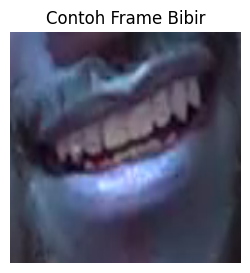

(128, 50)


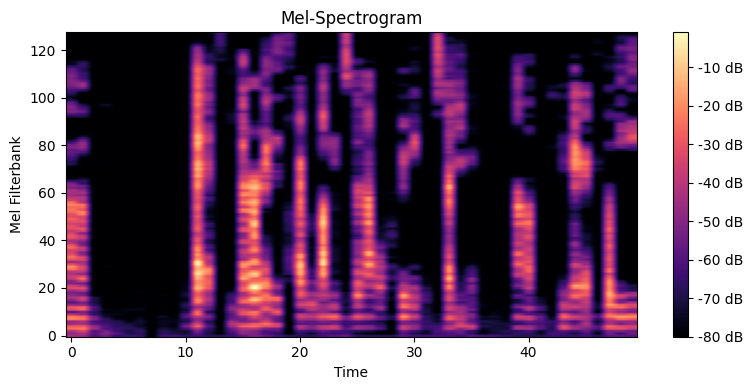

In [10]:
import torch
import matplotlib.pyplot as plt

# Path ke file .pt
pt_path = "Dataset Deepfake Preprocessed/Preprocessed Bibir Audio/wrnfrclvdo.pt"

# Load file
data = torch.load(pt_path)

# Ambil elemen
frames = data['frames']
audio = data['audio']
label = data['label'] 

print(f"Jumlah Frame Visual : {frames.shape}")
print(frames[0])
print(f"Ukuran Audio Tensor : {audio.shape}")
print(audio[0])
print(f"Label               : {label} ({'REAL' if label == 0 else 'LIP-SYNC DEEPFAKE'})")

# Tampilkan satu frame bibir
frame_idx = 0
frame = frames[frame_idx].permute(1, 2, 0).numpy()
plt.figure(figsize=(3,3))
plt.title("Contoh Frame Bibir")
plt.imshow(frame)
plt.axis('off')
plt.show()

# Tampilkan mel-spectrogram
mel = audio.squeeze(0).numpy()
print(mel.shape)
plt.figure(figsize=(8, 4))
plt.imshow(mel, aspect='auto', origin='lower', cmap='magma')
plt.title("Mel-Spectrogram")
plt.xlabel("Time")
plt.ylabel("Mel Filterbank")
plt.colorbar(format="%+2.0f dB")
plt.tight_layout()
plt.show()